<a href="https://colab.research.google.com/github/Aswin-Vellaichamy/Delhivery_Feature_Engineering/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

 The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# Problem Statement

The company wants to understand and process the data coming out of data engineering pipelines:
1. Clean, sanitize and manipulate data to get useful features out of raw fields
2. Make sense out of the raw data and help the data science team to build forecasting models on it


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery.csv

--2024-01-10 16:06:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.58, 18.164.173.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M   173MB/s    in 0.3s    

2024-01-10 16:06:25 (173 MB/s) - ‘delhivery.csv’ saved [55617130/55617130]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

from matplotlib.lines import Line2D
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_columns', 500)

In [ ]:
data = pd.read_csv('delhivery.csv')
df = data.copy()
data

data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
...                                                   ...        ...   
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time                 od_end_time  \
0       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4       2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
...                            ...                         ...   
144862  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144863  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144864  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144865  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   
144866  2018-09-20 16:24:28.436231  2018-09-20 23:32:09.618069   

        start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                         86.0       True              9   
1          

In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Shape of the data
data_shape = df.shape
print("==> Data shape : ", data_shape)

==> Data shape :  (144867, 24)


In [ ]:
# Data types of all attributes
data_types = df.dtypes
print("==> Data types : \n", data_types)

==> Data types : 
 data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor 

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("==> Missing values : \n", missing_values)

==> Missing values : 
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
# Dropping unknown fields
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
# Statistical summary of the data
statistical_summary = df.describe(include='all')
statistical_summary

data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   
mean         NaN                         NaN   
std          NaN                         NaN   
min          NaN                         NaN   
25%          NaN                         NaN   
50%          NaN                         NaN   
75%          NaN                         NaN   
max          NaN                         NaN   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   
mean                        NaN           NaN                            NaN   
std                         NaN           NaN                            NaN   
min                         NaN           NaN                            NaN   
25%                         NaN           NaN                            NaN   
50%                         NaN           NaN                            NaN   
75%                         NaN           NaN                            NaN   
max                         NaN           NaN                            NaN   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   
mean                  NaN                            NaN   
std                   NaN                            NaN   
min                   NaN                            NaN   
25%                   NaN                            NaN   
50%                   NaN                            NaN   
75%                   NaN                            NaN   
max                   NaN                            NaN   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   
mean                           NaN                         NaN   
std                            NaN                         NaN   
min                            NaN                         NaN   
25%                            NaN                         NaN   
50%                            NaN                         NaN   
75%                            NaN                         NaN   
max                            NaN                         NaN   

        start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count         

# Key Data Characteristics

# Structure
1. Dimensions: 144,867 rows and 24 columns.
2. Data Types:
    - Categorical or textual: object types.
    - Numerical: float64.
    - Boolean: is_cutoff field.

# Missing Values
1. Sparsely distributed:
    * source_name: 293 missing values.
    * destination_name: 261 missing values.
    * All other columns complete.

# Statistical Overview
# Numerical Columns
1.  Wide value ranges observed for start_scan_to_end_scan, actual_distance_to_destination, actual_time, and more.
2.  Negative values found in segment_actual_time and segment_factor, warranting further exploration.
3.  Variations in factor and segment_factor point to diverse efficiency or performance metrics.

# Categorical Columns

1. data: 2 unique values (likely training and testing data).
2. route_schedule_uuid: 1504 unique route schedules.
3. route_type: 2 unique values (e.g., 'Carting', 'FTL').
4. trip_uuid: 14817 unique trip identifiers.
5. source_center and destination_center: Over 1500 unique locations each.
6. source_name and destination_name: Nearly 1500 unique names each.
7. is_cutoff: A boolean field indicating cutoff status.

# Notable Observations

1. Wide variations in numerical columns suggest diverse trip characteristics and potential outliers.
2. Negative values in certain columns require investigation for data quality or interpretation nuances.
3. Variations in factor and segment_factor columns highlight potential performance differences.
4. Categorical columns provide context for trip types, schedules, and locations.


In [ ]:
for i in df.columns:
  print(f"No. of unique values for column {i:<32} = {df[i].nunique()}")

No. of unique values for column data                             = 2
No. of unique values for column trip_creation_time               = 14817
No. of unique values for column route_schedule_uuid              = 1504
No. of unique values for column route_type                       = 2
No. of unique values for column trip_uuid                        = 14817
No. of unique values for column source_center                    = 1508
No. of unique values for column source_name                      = 1498
No. of unique values for column destination_center               = 1481
No. of unique values for column destination_name                 = 1468
No. of unique values for column od_start_time                    = 26369
No. of unique values for column od_end_time                      = 26369
No. of unique values for column start_scan_to_end_scan           = 1915
No. of unique values for column actual_distance_to_destination   = 144515
No. of unique values for column actual_time                     

In [ ]:
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

# Converting to float32 for columns with float datatype
float_cols = ['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for i in float_cols:
  df[i] = df[i].astype('float32')

# Converting time columns to datetime format
dt_time_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for col in dt_time_cols:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

We see memory consumption has reduced by nearly 43%

In [ ]:
# Time period of data
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

In [ ]:
#time range of the dataset
df['trip_creation_time'].max() - df['od_end_time'].min()

Timedelta('21 days 23:09:31.887293')

# Handle missing values in the data.

In [ ]:
# We have only two columns with null values: source_name and destination_name
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
for i in missing_source_name:
    unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", i, "-" * 10, "Source Name :", 'Not Found')
    else :
        print("Source Center :", i, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [ ]:
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
# Rows where 'source_name' is null
rows_with_null_source_name = df['source_name'].isnull()

# Get 'source_center' values from these rows
source_centers_with_null_source_name = df.loc[rows_with_null_source_name, 'source_center']

# Check if each of these 'source_center' values is in 'missing_destination_name'
all_values_in_missing_destination_name = np.all(source_centers_with_null_source_name.isin(missing_destination_name))

all_values_in_missing_destination_name

False

# Treating missing values

In [ ]:
# Initialize a counter for unique placeholder names
count = 1

# Impute missing 'destination_name' values
for i in missing_destination_name:
    placeholder_name = f'location_{count}'
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, placeholder_name)
    count += 1

# Create and apply a mapping for 'source_center' to 'destination_name'
d = {}
for i in missing_source_name:
    unique_names = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    d[i] = unique_names if len(unique_names) > 0 else [f'location_{count}']
    count += (len(unique_names) == 0)

# Simplify the mapping to use only the first 'destination_name' or the assigned placeholder
d2 = {idx: val[0] for idx, val in d.items()}

# Apply the mapping to fill missing 'source_name' values
for i, v in d2.items():
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, v)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

# Merging of rows

In [ ]:
# Grouping by segment

# Creating a unique identifier for each segment of a trip
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

# Using cumsum() to merge the rows for specified columns based on segment_key
cumulative_columns = {
    'segment_actual_time': 'segment_actual_time_sum',
    'segment_osrm_distance': 'segment_osrm_distance_sum',
    'segment_osrm_time': 'segment_osrm_time_sum'
}

for original_col, new_col in cumulative_columns.items():
    df[new_col] = df.groupby('segment_key')[original_col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum',
      'segment_osrm_distance', 'segment_osrm_distance_sum',
      'segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  \
0       trip-153741093647649320_IND388121AAA_IND388620AAB   
1       trip-153741093647649320_IND388121AAA_IND388620AAB   
2       trip-153741093647649320_IND388121AAA_IND388620AAB   
3       trip-153741093647649320_IND388121AAA_IND388620AAB   
4       trip-153741093647649320_IND388121AAA_IND388620AAB   
...                                                   ...   
144862  trip-153746066843555182_IND131028AAB_IND000000ACB   
144863  trip-153746066843555182_IND131028AAB_IND000000ACB   
144864  trip-153746066843555182_IND131028AAB_IND000000ACB   
144865  trip-153746066843555182_IND131028AAB_IND000000ACB   
144866  trip-153746066843555182_IND131028AAB_IND000000ACB   

        segment_actual_time  segment_actual_time_sum  segment_osrm_distance  \
0                      14.0                     14.0              11.965300   
1                      10.0                     24.0               9.759000   
2                      16.0                     40.0              10.815200   
3                      21.0                     61.0              13.022400   
4                       6.0                     67.0               3.915300   
...                     ...                      ...                    ...   
144862                 12.0                     92.0               8.185800   
144863                 26.0                    118.0              17.372499   
144864                 20.0                    138.0              20.705299   
144865                 17.0                    155.0              18.888500   
144866                268.0                    423.0               8.808800   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                       11.965300               11.0                   11.0  
1                       21.724300                9.0                   20.0  
2                       32.539497                7.0                   27.0  
3                       45.561897               12.0                   39.0  
4                       49.477200                5.0                   44.0  
...                           ...                ...                    ...  
144862                  65.348701               12.0                   94.0  
144863                  82.721199               21.0                  115.0  
144864                 103.426498               34.0                  149.0  
144865                 122.315002               27.0                  176.0  
144866                 131.123795                9.0                  185.0  

[144867 rows x 7 columns]

In [ ]:
# Aggregating at segment level

# Creating a dictionary for aggregation at segment level
create_segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and applying the aggregation operations
seg_agg_data = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Sorting in ascending order
seg_agg_data = seg_agg_data.sort_values(by=['segment_key','od_end_time'])

seg_agg_data

segment_key  \
0      trip-153671041653548748_IND209304AAA_IND000000ACB   
1      trip-153671041653548748_IND462022AAA_IND209304AAA   
2      trip-153671042288605164_IND561203AAB_IND562101AAA   
3      trip-153671042288605164_IND572101AAA_IND561203AAB   
4      trip-153671043369099517_IND000000ACB_IND160002AAC   
...                                                  ...   
26363  trip-153861115439069069_IND628204AAA_IND627657AAA   
26364  trip-153861115439069069_IND628613AAA_IND627005AAA   
26365  trip-153861115439069069_IND628801AAA_IND628204AAA   
26366  trip-153861118270144424_IND583119AAA_IND583101AAA   
26367  trip-153861118270144424_IND583201AAA_IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26363  trip-153861115439069069      test    Carting   
26364  trip-153861115439069069      test    Carting   
26365  trip-153861115439069069      test    Carting   
26366  trip-153861118270144424      test        FTL   
26367  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26363 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26364 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26365 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26366 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26367 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26363  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26364    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26365     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26366                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26367          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26363 2018-10-04 03:31:11.183797                    62.0   
26364 2018-10-04 05:47:45.162682                    91.0   
26365 2018-10-04 02:29:04.272194                    44.0   
26366 2018-10-04 08:46:09.166940                   287.0   
26367 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759155        732.0      329.0     446.549591   
1               

The rows have been merged based on the unique segment_key, which is a combination of trip_uuid, source_center, and destination_center. The aggregated dataset reflects the total values for each segment of the trip. How the aggregation was performed:

# Numerical Fields:
   - The Feilds **segment_actual_time**, **segment_osrm_time**, **segment_osrm_distance** were summed up.
   - This gives a total measure of time and distance for each unique segment.

# Categorical/Boolean Fields:
1.    For fields like route_type, the first value in each group was kept.
2.     The data field, which distinguishes between training and testing data, was also preserved with the first value.

# Source and Destination Names:
1.    The source_name field retains the first source name for each segment.
2.    The destination_name field holds the last destination name for each segment.

# Feature Engineering

Calulating time taken between od_start_time and od_end_time

In [ ]:
# Preparing for trip-level aggregation

# 1. Calculating time difference between od_start_time and od_end_time
seg_agg_data['od_total_time'] = (
    seg_agg_data['od_end_time'] - seg_agg_data['od_start_time']
).dt.total_seconds() / 60

create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_total_time' : 'sum',
  'trip_creation_time' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'source_name': 'first',
  'destination_name': 'last',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  }

fe = seg_agg_data.groupby('trip_uuid').agg(create_trip_dict).reset_index()
fe

trip_uuid      data route_type  od_total_time  \
0      trip-153671041653548748  training        FTL    2260.109800   
1      trip-153671042288605164  training    Carting     181.611874   
2      trip-153671043369099517  training        FTL    3934.362520   
3      trip-153671046011330457  training    Carting     100.494935   
4      trip-153671052974046625  training        FTL     718.349042   
...                        ...       ...        ...            ...   
14812  trip-153861095625827784      test    Carting     258.028928   
14813  trip-153861104386292051      test    Carting      60.590521   
14814  trip-153861106442901555      test    Carting     422.119867   
14815  trip-153861115439069069      test    Carting     348.512862   
14816  trip-153861118270144424      test        FTL     354.407571   

              trip_creation_time  start_scan_to_end_scan  \
0     2018-09-12 00:00:16.535741                  2259.0   
1     2018-09-12 00:00:22.886430                   180.0   
2     2018-09-12 00:00:33.691250                  3933.0   
3     2018-09-12 00:01:00.113710                   100.0   
4     2018-09-12 00:02:09.740725                   717.0   
...                          ...                     ...   
14812 2018-10-03 23:55:56.258533                   257.0   
14813 2018-10-03 23:57:23.863155                    60.0   
14814 2018-10-03 23:57:44.429324                   421.0   
14815 2018-10-03 23:59:14.390954                   347.0   
14816 2018-10-03 23:59:42.701692                   353.0   

                               source_name  \
0       Kanpur_Central_H_6 (Uttar Pradesh)   
1        Doddablpur_ChikaDPP_D (Karnataka)   
2            Gurgaon_Bilaspur_HB (Haryana)   
3                 Mumbai Hub (Maharashtra)   
4                   Bellary_Dc (Karnataka)   
...                                    ...   
14812       Chandigarh_Mehmdpur_H (Punjab)   
14813         FBD_Balabhgarh_DPC (Haryana)   
14814   Kanpur_GovndNgr_DC (Uttar Pradesh)   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   
14816        Sandur_WrdN1DPP_D (Karnataka)   

                         destination_name  actual_distance_to_destination  \
0      Kanpur_Central_H_6 (Uttar Pradesh)                      824.732849   
1       Doddablpur_ChikaDPP_D (Karnataka)                       73.186905   
2           Gurgaon_Bilaspur_HB (Haryana)                     1927.404297   
3          Mumbai_MiraRd_IP (Maharashtra)                       17.175274   
4           Sandur_WrdN1DPP_D (Karnataka)                      127.448502   
...                                   ...                             ...   
14812      Chandigarh_Mehmdpur_H (Punjab)                       57.762333   
14813      Faridabad_Blbgarh_DC (Haryana)                       15.513784   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh)                       38.684837   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu)                      134.723831   
14816       Sandur_WrdN1DPP_D (Karnataka)                       66.081528   

       actual_time  osrm_time  osrm_distance  segment_actual_time  \
0           1562.0      717.0     991.352295               1548.0   
1            143.0       68.0      85.111000                141.0   
2           3347.0     1740.0    2354.066650               3308.0   
3             59.0       15.0      19.680000                 59.0   
4            341.0      117.0     146.791794                340.0   
...            ...        ...            ...                  ...   
14812         83.0       62.0      73.462997                 82.0   
14813         21.0       12.0      16.088200                 21.0   
14814        282.0       48.0      58.903702                281.0   
14815        264.0      179.0     171.110306                258.0   
14816        275.0       68.0      80.578705                274.0   

       segment_osrm_time  segment_osrm_distance  segment_actual_time_sum  \
0                 1008.0            1320.473267                   1548.0   


In [ ]:
# 4. Extracting features like month, year, day, etc. from Trip_creation_time
fe['trip_creation_month'] = fe['trip_creation_time'].dt.month
fe['trip_creation_year'] = fe['trip_creation_time'].dt.year
fe['trip_creation_day'] = fe['trip_creation_time'].dt.day
fe['trip_creation_hour'] = fe['trip_creation_time'].dt.hour
fe['trip_creation_weekday'] = fe['trip_creation_time'].dt.weekday
fe['trip_creation_week'] = fe['trip_creation_time'].dt.isocalendar().week
fe

trip_uuid      data route_type  od_total_time  \
0      trip-153671041653548748  training        FTL    2260.109800   
1      trip-153671042288605164  training    Carting     181.611874   
2      trip-153671043369099517  training        FTL    3934.362520   
3      trip-153671046011330457  training    Carting     100.494935   
4      trip-153671052974046625  training        FTL     718.349042   
...                        ...       ...        ...            ...   
14812  trip-153861095625827784      test    Carting     258.028928   
14813  trip-153861104386292051      test    Carting      60.590521   
14814  trip-153861106442901555      test    Carting     422.119867   
14815  trip-153861115439069069      test    Carting     348.512862   
14816  trip-153861118270144424      test        FTL     354.407571   

              trip_creation_time  start_scan_to_end_scan  \
0     2018-09-12 00:00:16.535741                  2259.0   
1     2018-09-12 00:00:22.886430                   180.0   
2     2018-09-12 00:00:33.691250                  3933.0   
3     2018-09-12 00:01:00.113710                   100.0   
4     2018-09-12 00:02:09.740725                   717.0   
...                          ...                     ...   
14812 2018-10-03 23:55:56.258533                   257.0   
14813 2018-10-03 23:57:23.863155                    60.0   
14814 2018-10-03 23:57:44.429324                   421.0   
14815 2018-10-03 23:59:14.390954                   347.0   
14816 2018-10-03 23:59:42.701692                   353.0   

                               source_name  \
0       Kanpur_Central_H_6 (Uttar Pradesh)   
1        Doddablpur_ChikaDPP_D (Karnataka)   
2            Gurgaon_Bilaspur_HB (Haryana)   
3                 Mumbai Hub (Maharashtra)   
4                   Bellary_Dc (Karnataka)   
...                                    ...   
14812       Chandigarh_Mehmdpur_H (Punjab)   
14813         FBD_Balabhgarh_DPC (Haryana)   
14814   Kanpur_GovndNgr_DC (Uttar Pradesh)   
14815  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   
14816        Sandur_WrdN1DPP_D (Karnataka)   

                         destination_name  actual_distance_to_destination  \
0      Kanpur_Central_H_6 (Uttar Pradesh)                      824.732849   
1       Doddablpur_ChikaDPP_D (Karnataka)                       73.186905   
2           Gurgaon_Bilaspur_HB (Haryana)                     1927.404297   
3          Mumbai_MiraRd_IP (Maharashtra)                       17.175274   
4           Sandur_WrdN1DPP_D (Karnataka)                      127.448502   
...                                   ...                             ...   
14812      Chandigarh_Mehmdpur_H (Punjab)                       57.762333   
14813      Faridabad_Blbgarh_DC (Haryana)                       15.513784   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh)                       38.684837   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu)                      134.723831   
14816       Sandur_WrdN1DPP_D (Karnataka)                       66.081528   

       actual_time  osrm_time  osrm_distance  segment_actual_time  \
0           1562.0      717.0     991.352295               1548.0   
1            143.0       68.0      85.111000                141.0   
2           3347.0     1740.0    2354.066650               3308.0   
3             59.0       15.0      19.680000                 59.0   
4            341.0      117.0     146.791794                340.0   
...            ...        ...            ...                  ...   
14812         83.0       62.0      73.462997                 82.0   
14813         21.0       12.0      16.088200                 21.0   
14814        282.0       48.0      58.903702                281.0   
14815        264.0      179.0     171.110306                258.0   
14816        275.0       68.0      80.578705                274.0   

       segment_osrm_time  segment_osrm_distance  segment_actual_time_sum  \
0                 1008.0            1320.473267                   1548.0   


# Extract city, state and place for source and destination.

In [ ]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [ ]:
fe['source_state'] = fe['source_name'].apply(location_name_to_state)
fe['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [ ]:
fe['source_city'] = fe['source_name'].apply(location_name_to_city)
fe['source_city'].unique()[:100]

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [ ]:
fe['source_place'] = fe['source_name'].apply(location_name_to_place)
fe['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

In [ ]:
fe['destination_state'] = fe['destination_name'].apply(location_name_to_state)
fe['destination_state'].value_counts()

Maharashtra               2561
Karnataka                 2294
Haryana                   1643
Tamil Nadu                1084
Uttar Pradesh              811
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      652
Punjab                     617
Rajasthan                  543
Andhra Pradesh             442
Bihar                      365
Madhya Pradesh             358
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
location_3                  17
Meghalaya                    8
Mizoram                      6
location_11                  3
location_13                  2
location_6                   1
location

In [ ]:
fe['destination_city'] = fe['destination_name'].apply(location_name_to_city)
fe['destination_city'].unique()

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Ratnagiri',
       'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna', 'Guwahati',
       'Bareli', 'Nashik', 'Hooghly', 'Sivasagar', 'Palani', 'Jalandhar',
       'Chandigarh', 'Yavatmal', 'Sangola', 'Kolkata', 'Savner',
       'Kurnool', 'Bhatinda', 'Bhiwandi', 'Barnala', 'Murbad', 'Kadaba',
       'Gulbarga', 'Naraingarh', 'Ludhiana', 'Kadi', 'Jabalpur',
       'Gangakher', 'Bankura', 'Silvassa', 'Porbandar', 'Jetpur',
       'Khammam', 'Mehsana', 'Katni', 'Una', 'Malavalli', 'HDKote',
       'Radhanpur', 'Visakhapatnam', 'Pune', 'Bhopal', 'Bhubaneshwar',
       'Allahabad', 'Sonipat', 'Himmatnagar', 'Sasaram', 'Ranchi',
       'Thiruvarur', 'Ghaziabad', 'Anand', 'Nanded', 'Noida', 'Nadiad',
       'Virudhchlm', 'Durgapur', 'Bhadrak', 'Goa', 'Balurghat', 'Hisar',
       'Tiruppattur', 'Kotdwara', 'Yellareddy', 'Halvad', 'Hospet',
       'JognderNgr', 

In [ ]:
fe['destination_place'] = fe['destination_name'].apply(location_name_to_place)
fe['destination_place'].unique()

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'MiraRd_IP',
       'WrdN1DPP_D', 'Poonamallee', 'Vandalur_Dc', 'HBR Layout PC',
       'Central_D_3', 'Bhogal', 'unknown_place', 'MjgaonRd_D',
       'Nelmngla_H', 'Uppal_I', 'RazaviRd_D', 'Central_I_7',
       'Central_I_2', 'Hub', 'SourvDPP_D', 'Varachha_DC', 'TgrniaRD_I',
       'DC', 'Gokulam_D', 'Babupaty_D', 'Bomsndra_HB', 'Alwal_I',
       'RjndraRd_D', 'Mehmdpur_H', 'Sanpada_I', 'JajuDPP_D',
       'Central_DPP_2', 'Dankuni_HB', 'Wagodha_D', 'AbbasNgr_I',
       'Balabhgarh_DPC', 'DPC', 'Mankoli_HB', 'Shamshbd_H', 'SnkunDPP_D',
       'Kharar_DC', 'AnugrDPP_D', 'Nehrugnj_I', 'Ward2DPP_D',
       'MilrGanj_HB', 'KaranNGR_D', 'Adhartal_IP', 'Poonamallee_HB',
       'Busstand_D', 'BhowmDPP_D', 'Samrvrni_D', 'NSTRoad_I',
       'Panchot_IP', 'Bargawan_DC', 'KGAirprt_HB', 'Mamlatdr_DC',
       'SulthnRd_D', 'Jogeshwri_L', 'BegurRD_D', 'Santalpr_D',
       'Gajuwaka_IP', 'Tathawde_H', 'Trnsport_H', 'Central_H_1',
       'Kundli_H', 

In [ ]:
# Dropping the original columns
fe = fe.drop(['source_name', 'destination_name'], axis=1)
fe

trip_uuid      data route_type  od_total_time  \
0      trip-153671041653548748  training        FTL    2260.109800   
1      trip-153671042288605164  training    Carting     181.611874   
2      trip-153671043369099517  training        FTL    3934.362520   
3      trip-153671046011330457  training    Carting     100.494935   
4      trip-153671052974046625  training        FTL     718.349042   
...                        ...       ...        ...            ...   
14812  trip-153861095625827784      test    Carting     258.028928   
14813  trip-153861104386292051      test    Carting      60.590521   
14814  trip-153861106442901555      test    Carting     422.119867   
14815  trip-153861115439069069      test    Carting     348.512862   
14816  trip-153861118270144424      test        FTL     354.407571   

              trip_creation_time  start_scan_to_end_scan  \
0     2018-09-12 00:00:16.535741                  2259.0   
1     2018-09-12 00:00:22.886430                   180.0   
2     2018-09-12 00:00:33.691250                  3933.0   
3     2018-09-12 00:01:00.113710                   100.0   
4     2018-09-12 00:02:09.740725                   717.0   
...                          ...                     ...   
14812 2018-10-03 23:55:56.258533                   257.0   
14813 2018-10-03 23:57:23.863155                    60.0   
14814 2018-10-03 23:57:44.429324                   421.0   
14815 2018-10-03 23:59:14.390954                   347.0   
14816 2018-10-03 23:59:42.701692                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732849       1562.0      717.0     991.352295   
1                           73.186905        143.0       68.0      85.111000   
2                         1927.404297       3347.0     1740.0    2354.066650   
3                           17.175274         59.0       15.0      19.680000   
4                          127.448502        341.0      117.0     146.791794   
...                               ...          ...        ...            ...   
14812                       57.762333         83.0       62.0      73.462997   
14813                       15.513784         21.0       12.0      16.088200   
14814                       38.684837        282.0       48.0      58.903702   
14815                      134.723831        264.0      179.0     171.110306   
14816                       66.081528        275.0       68.0      80.578705   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0            1320.473267   
1                    141.0               65.0              84.189400   
2                   3308.0             1941.0            2545.267822   
3                     59.0               16.0              19.876600   
4                    340.0              115.0             146.791901   
...                    ...                ...                    ...   
14812                 82.0               62.0              64.855103   
14813                 21.0               11.0              16.088299   
14814                281.0               88.0             104.886597   
14815                258.0              221.0             223.532394   
14816                274.0               67.0              80.578705   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14812                     82.0                   62.0   
14813                     21.0                   11.0   
14814                    281.0                   88.0   
14815                    258.0                  221.0   
14816 

This trip-level dataset is ready for further analysis, such as examining patterns in trip durations, distances, and understanding the distribution of trips over time and geography.

# 4. In-Depth Analysis

In [ ]:
fe.describe().T

count        mean         std        min  \
od_total_time                   14817.0  531.795209  659.184525  23.461468   
start_scan_to_end_scan          14817.0  530.809998  658.705933       23.0   
actual_distance_to_destination  14817.0  164.477829  305.388153   9.002461   
actual_time                     14817.0  357.143768  561.396118        9.0   
osrm_time                       14817.0  161.384018  271.360992        6.0   
osrm_distance                   14817.0  204.344711  370.395569     9.0729   
segment_actual_time             14817.0  353.892273  556.247925        9.0   
segment_osrm_time               14817.0  180.949783  314.542053        6.0   
segment_osrm_distance           14817.0  223.201157  416.628387     9.0729   
segment_actual_time_sum         14817.0  353.892273  556.247925        9.0   
segment_osrm_time_sum           14817.0  180.949783  314.542053        6.0   
segment_osrm_distance_sum       14817.0  223.201157  416.628387     9.0729   
trip_creation_month             14817.0    9.120672    0.325757        9.0   
trip_creation_year              14817.0      2018.0         0.0     2018.0   
trip_creation_day               14817.0    18.37079    7.893275        1.0   
trip_creation_hour              14817.0   12.449821    7.986553        0.0   
trip_creation_weekday           14817.0    2.919349    1.927769        0.0   
trip_creation_week              14817.0   38.295944    0.967872       37.0   

                                       25%         50%         75%  \
od_total_time                   149.930591  280.765626  638.199071   
start_scan_to_end_scan               149.0       280.0       637.0   
actual_distance_to_destination   22.837238   48.474072  164.583206   
actual_time                           67.0       149.0       370.0   
osrm_time                             29.0        60.0       168.0   
osrm_distance                    30.819201   65.618805  208.475006   
segment_actual_time                   66.0       147.0       367.0   
segment_osrm_time                     31.0        65.0       185.0   
segment_osrm_distance            32.654499   70.154404  218.802399   
segment_actual_time_sum               66.0       147.0       367.0   
segment_osrm_time_sum                 31.0        65.0       185.0   
segment_osrm_distance_sum        32.654499   70.154404  218.802399   
trip_creation_month                    9.0         9.0         9.0   
trip_creation_year                  2018.0      2018.0      2018.0   
trip_creation_day                     14.0        19.0        25.0   
trip_creation_hour                     4.0        14.0        20.0   
trip_creation_weekday                  1.0         3.0         5.0   
trip_creation_week                    38.0        38.0        39.0   

                                        max  
od_total_time                   7898.551955  
start_scan_to_end_scan               7898.0  
actual_distance_to_destination  2186.531738  
actual_time                          6265.0  
osrm_time                            2032.0  
osrm_distance                   2840.081055  
segment_actual_time                  6230.0  
segment_osrm_time                    2564.0  
segment_osrm_distance           3523.632324  
segment_actual_time_sum              6230.0  
segment_osrm_time_sum                2564.0  
segment_osrm_distance_sum       3523.632324  
trip_creation_month                    10.0  
trip_creation_year                   2018.0  
trip_creation_day                      30.0  
trip_creation_hour                     23.0  
trip_creation_weekday                   6.0  
trip_creation_week                     40.0

In [ ]:
fe.describe(include = object).T

count unique                      top  freq
trip_uuid          14817  14817  trip-153671041653548748     1
source_state       14817     34              Maharashtra  2714
source_city        14817    690                   Mumbai  1442
source_place       14817    761              Bilaspur_HB  1063
destination_state  14817     39              Maharashtra  2561
destination_city   14817    806                   Mumbai  1548
destination_place  14817    850              Bilaspur_HB   821

[]

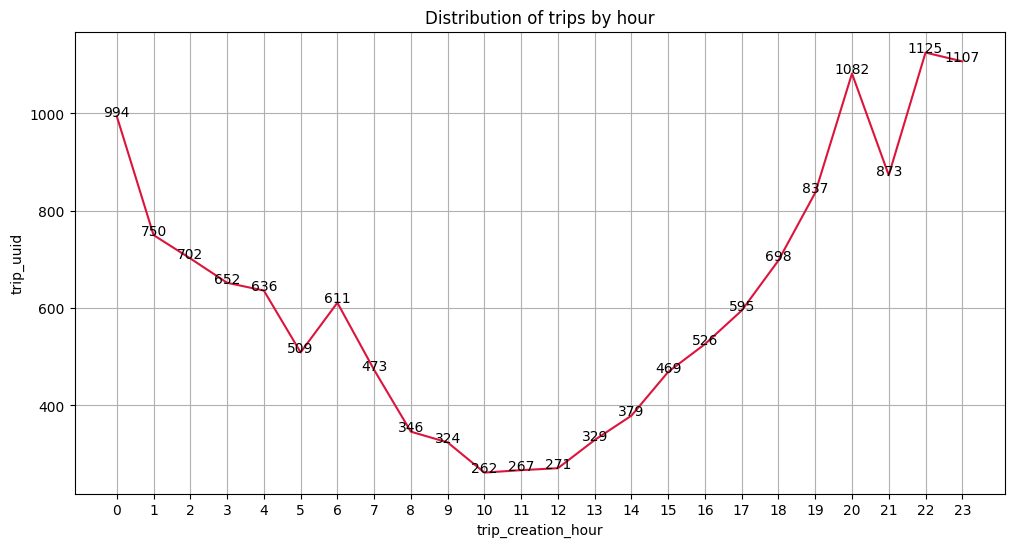

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# Distribution of trips by hour
fe_by_hour = fe.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = fe,
             x = fe_by_hour['trip_creation_hour'],
             y = fe_by_hour['trip_uuid'],
             markers = '*', color = 'crimson')
plt.xticks(np.arange(0,24))
plt.grid('both')
addlabels(fe_by_hour['trip_creation_hour'],fe_by_hour['trip_uuid'])
plt.title('Distribution of trips by hour')
plt.plot()

[]

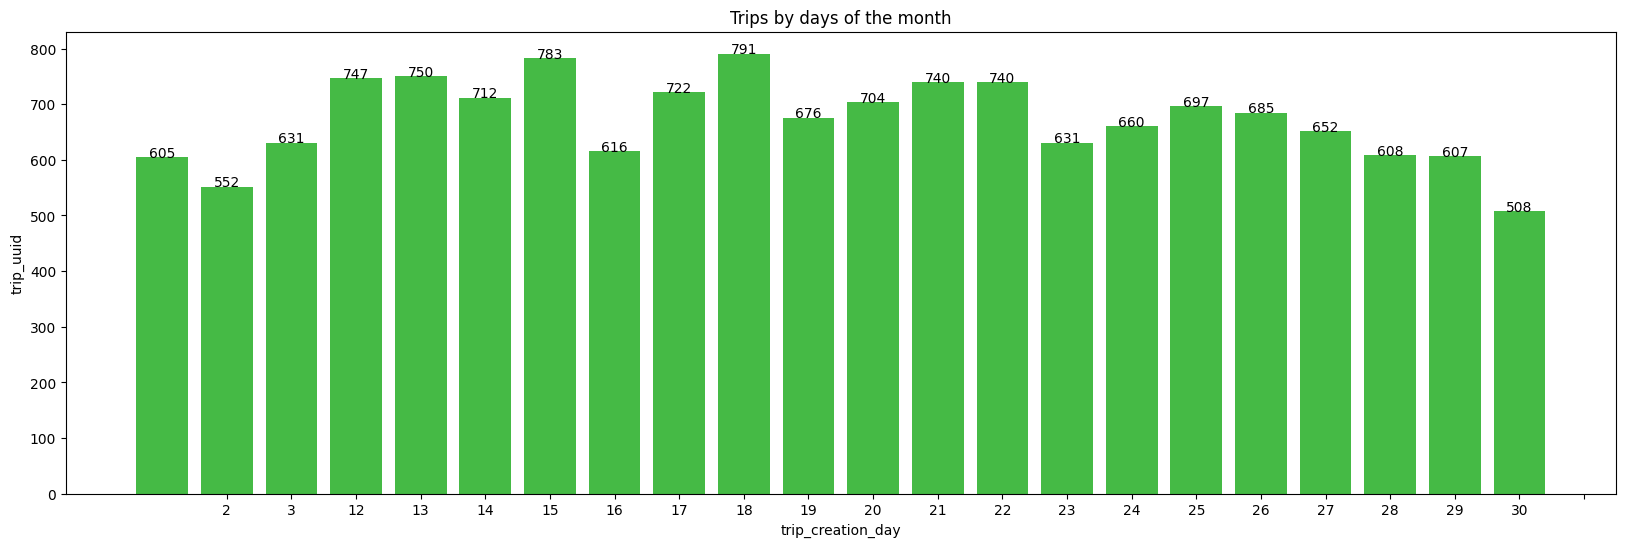

In [ ]:
# Distribution of trips by days of the month
fe_by_day = fe.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (20, 6))
sns.barplot(data = fe,
             x = fe_by_day['trip_creation_day'],
             y = fe_by_day['trip_uuid'], color = 'limegreen')
plt.xticks(np.arange(1,32))
addlabels(fe_by_day['trip_creation_day'],fe_by_day['trip_uuid'])
plt.title('Trips by days of the month')
plt.plot()

[]

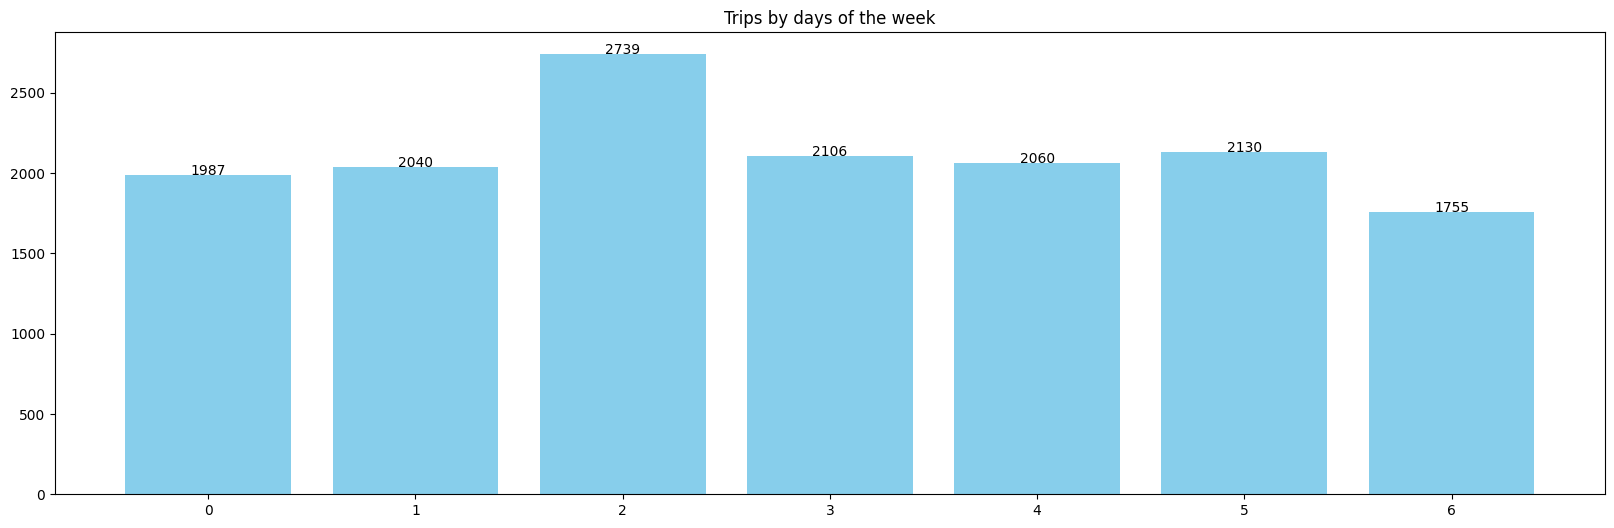

In [ ]:
# Count of trips by days of the week
fe_by_weekday = fe.groupby(by = 'trip_creation_weekday')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (20, 6))
s = plt.bar(fe_by_weekday['trip_creation_weekday'], fe_by_weekday['trip_uuid'],
             color = 'skyblue')
plt.xticks(np.arange(0,7))
addlabels(fe_by_weekday['trip_creation_weekday'],fe_by_weekday['trip_uuid'])
plt.title('Trips by days of the week')
plt.plot()

Tuesday seems to be the day with the highest trip creation time. This could be because that there is a day gap given post the weekend when people would make the most purchases so as to consolidate the orders and reduce trips.

[]

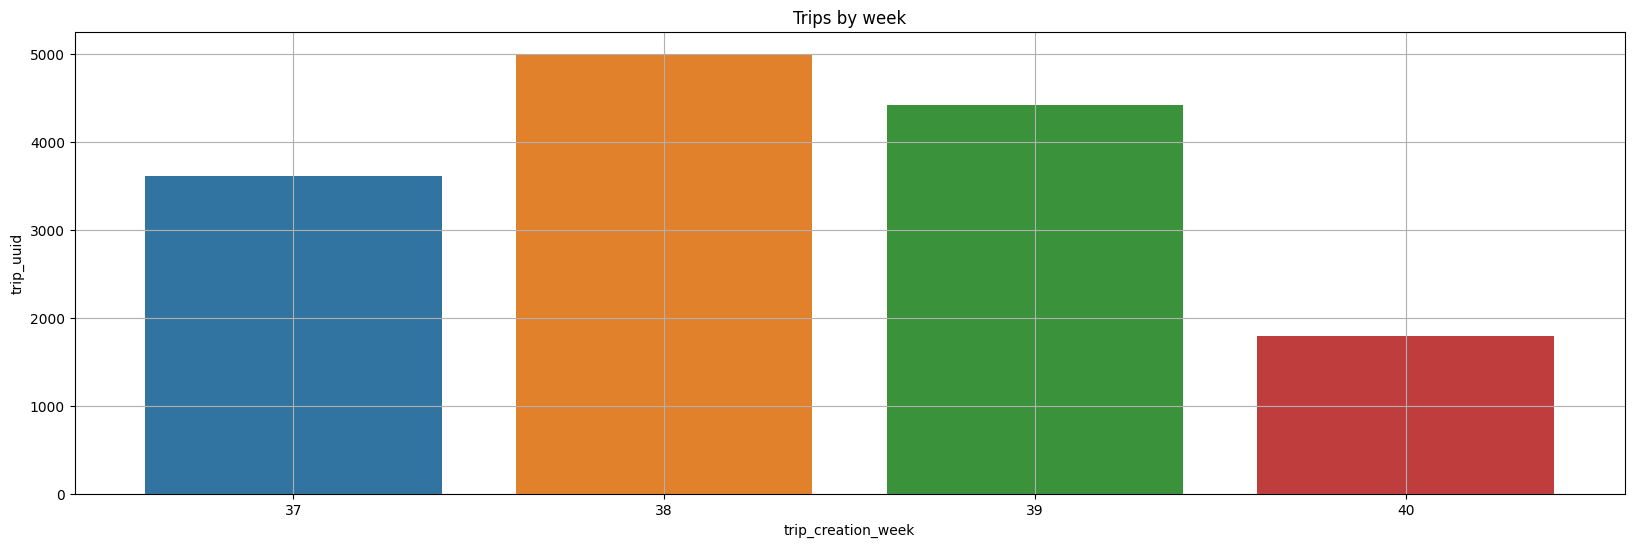

In [ ]:
# Count of trips by week of the year
fe_by_week = fe.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (20, 6))
sns.barplot(data = fe,
             x = fe_by_week['trip_creation_week'],
             y = fe_by_week['trip_uuid'])
plt.grid('both')
plt.title('Trips by week')
plt.plot()

Most trips are created in the 38th week of the year

In [ ]:
fe['trip_creation_month'].value_counts(normalize = True) * 100

9     87.93278
10    12.06722
Name: trip_creation_month, dtype: float64

Either September has the most number of trips created, or the data is insufficient to confirm on the monthly trips.

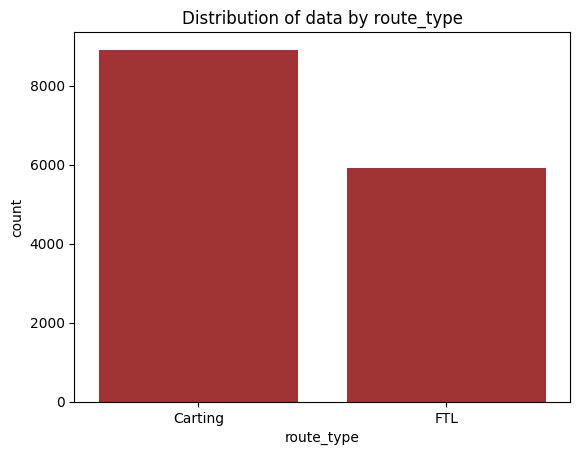

In [ ]:
# Distribution of data by route_type
sns.countplot(data=fe,x='route_type', color= 'firebrick')
plt.title('Distribution of data by route_type')
plt.show()

By the given data, more trips are done by the 'Carting' Transportation type.

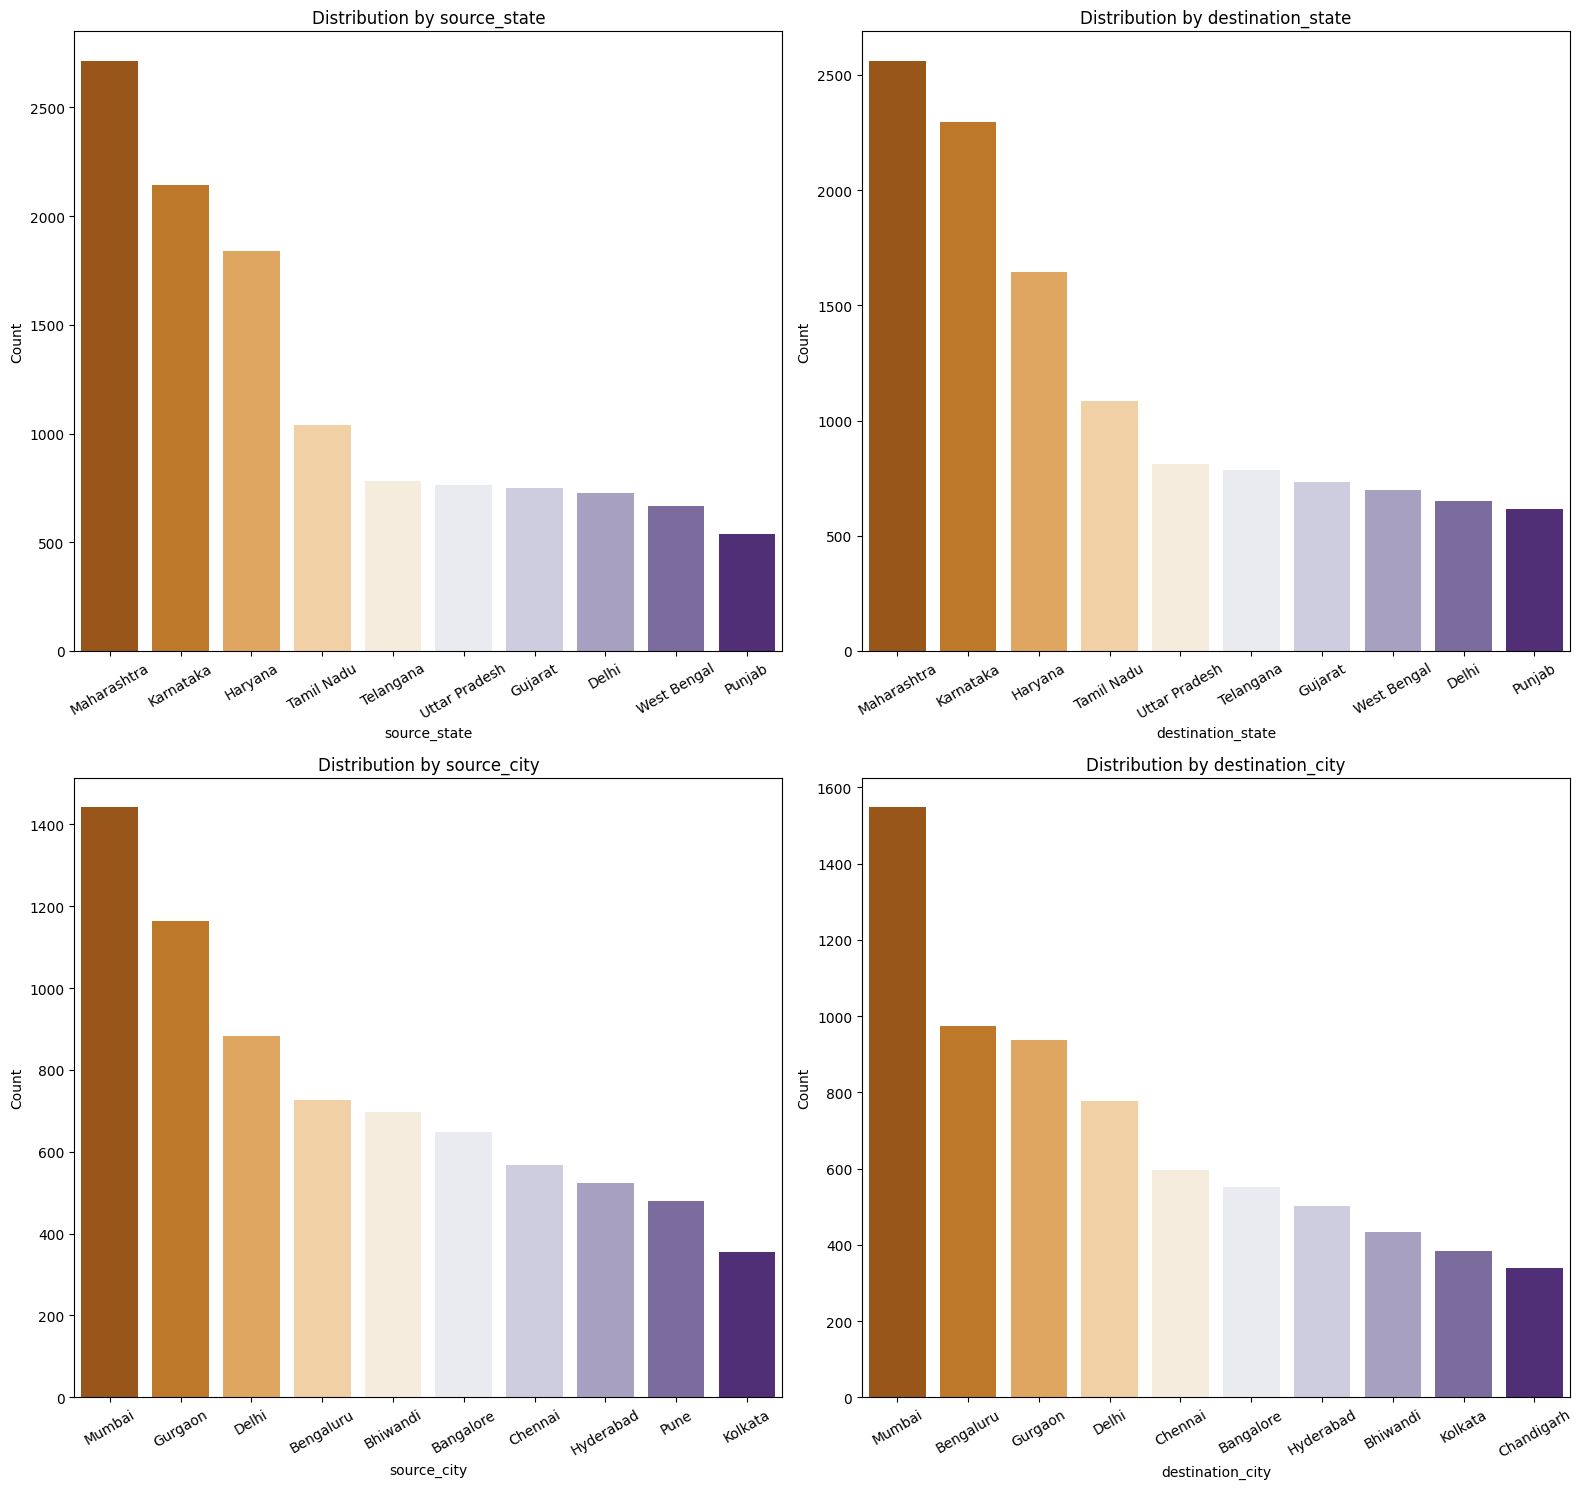

In [ ]:
# State with most trips

# plt.figure(figsize = (20, 6))
# sns.countplot(data=fe, x=fe['source_state'])
# plt.xticks(rotation=75)
# plt.tight_layout()
# plt.show()

area_vars= ['source_state', 'destination_state', 'source_city', 'destination_city']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 15))
for i, var in enumerate(area_vars):
  ax = axes[i // 2, i % 2]
  sns.countplot(data=fe, x=var, ax=ax, order=fe[var].value_counts(normalize=True).nlargest(10).index, palette='PuOr')
  ax.set_title(f'Distribution by {var}')
  ax.set_ylabel('Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

- These four states – Maharashtra, Karnataka, Haryana, and Tamil Nadu – are major origin and destination points for delivery services.
- These four metropolitan hubs - Mumbai, Gurgaon, Delhi, and Bengaluru – account for a significant share of delivery origin points.
- Packages headed to Mumbai, Bengaluru, Gurgaon, and Delhi make up a significant portion of deliveries nationwide.

# Outlier Detection & Treatment

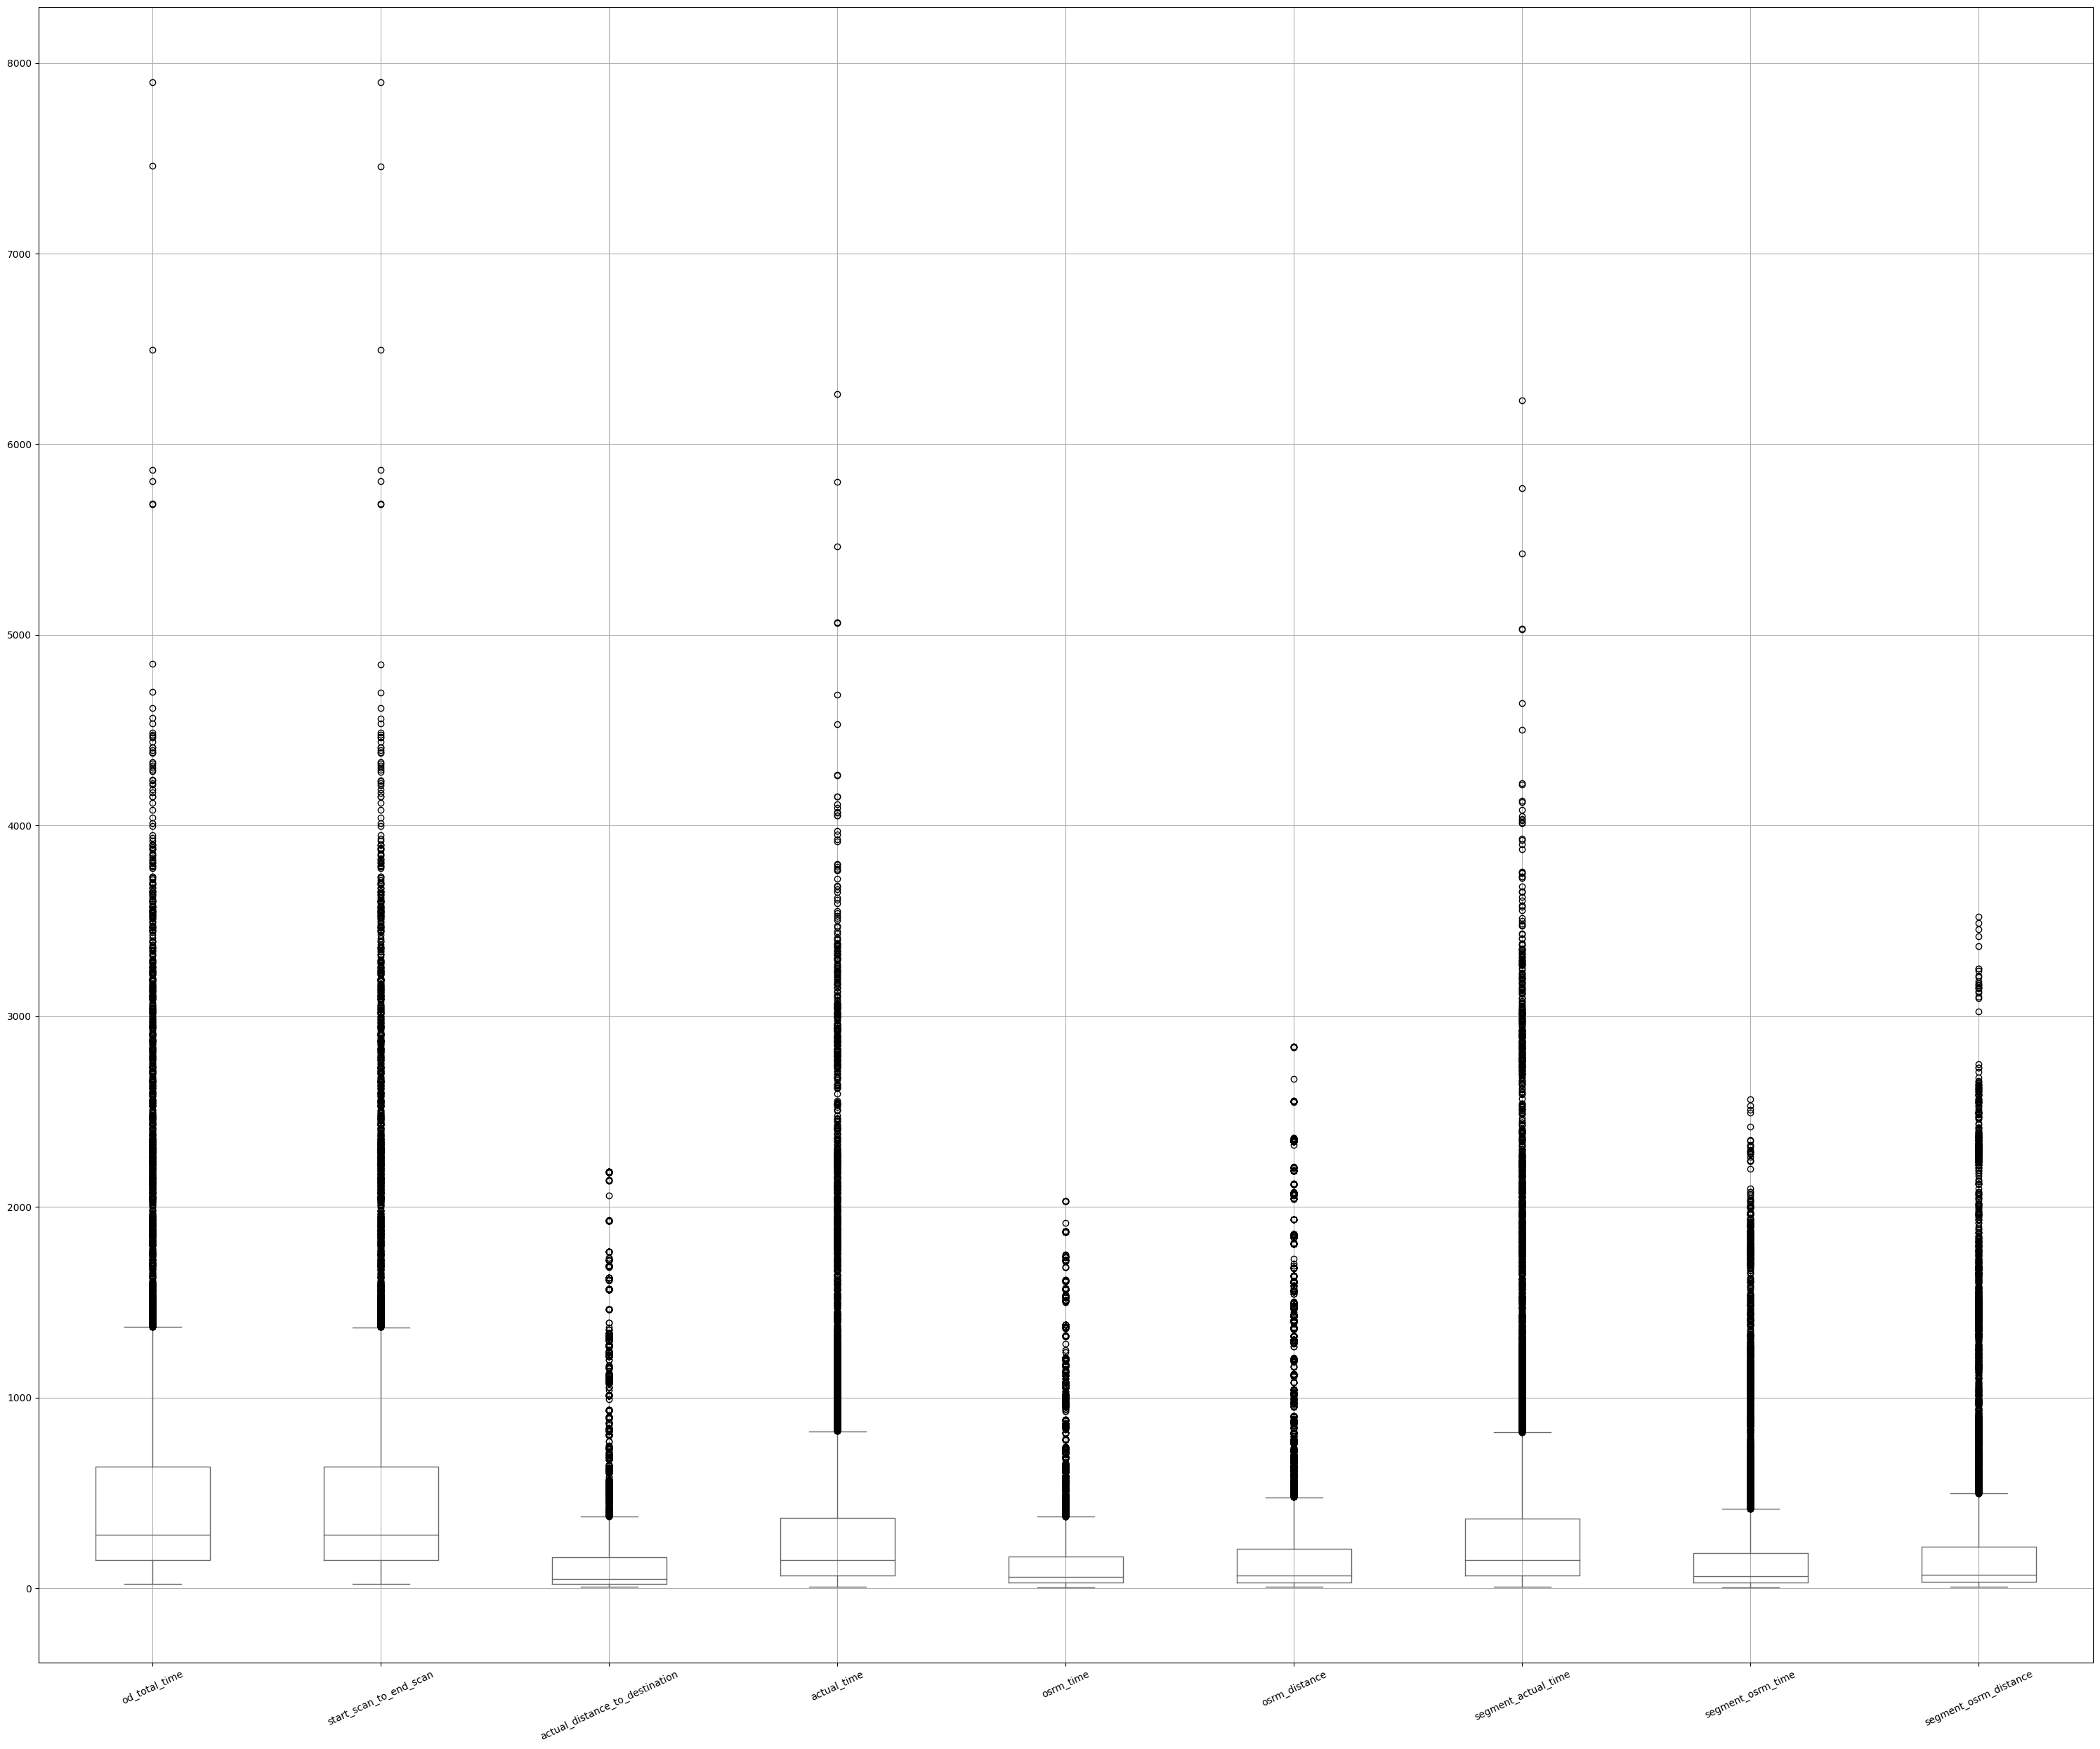

In [ ]:
# Selecting numerical features for outlier detection
numerical_features = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

# Plotting boxplots for numerical features to visualize outliers
plt.figure(figsize=(30, 25))

# for i, col in enumerate(numerical_features, 1):
#     plt.subplot(3, 3, i)
#     sns.boxplot(y=fe[col])
#     plt.title(col)
fe[numerical_features].boxplot(rot=25, figsize=(35,20), color = 'dimgray')
plt.tight_layout()
plt.show()

In [ ]:
# range of outliers are large and also lot in the numerical features.

# Detecting and handling outliers using IQR method
Q1 = fe[numerical_features].quantile(0.25)
Q3 = fe[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers by keeping only the values that are within 1.5*IQR of Q1 and Q3
fe_no_outliers = fe[~((fe[numerical_features] < (Q1 - 1.5 * IQR)) | (fe[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Comparing the shape of the original and outlier-removed dataframes
original_shape = fe.shape
outlier_removed_shape = fe_no_outliers.shape

original_shape, outlier_removed_shape

((14817, 28), (12759, 28))

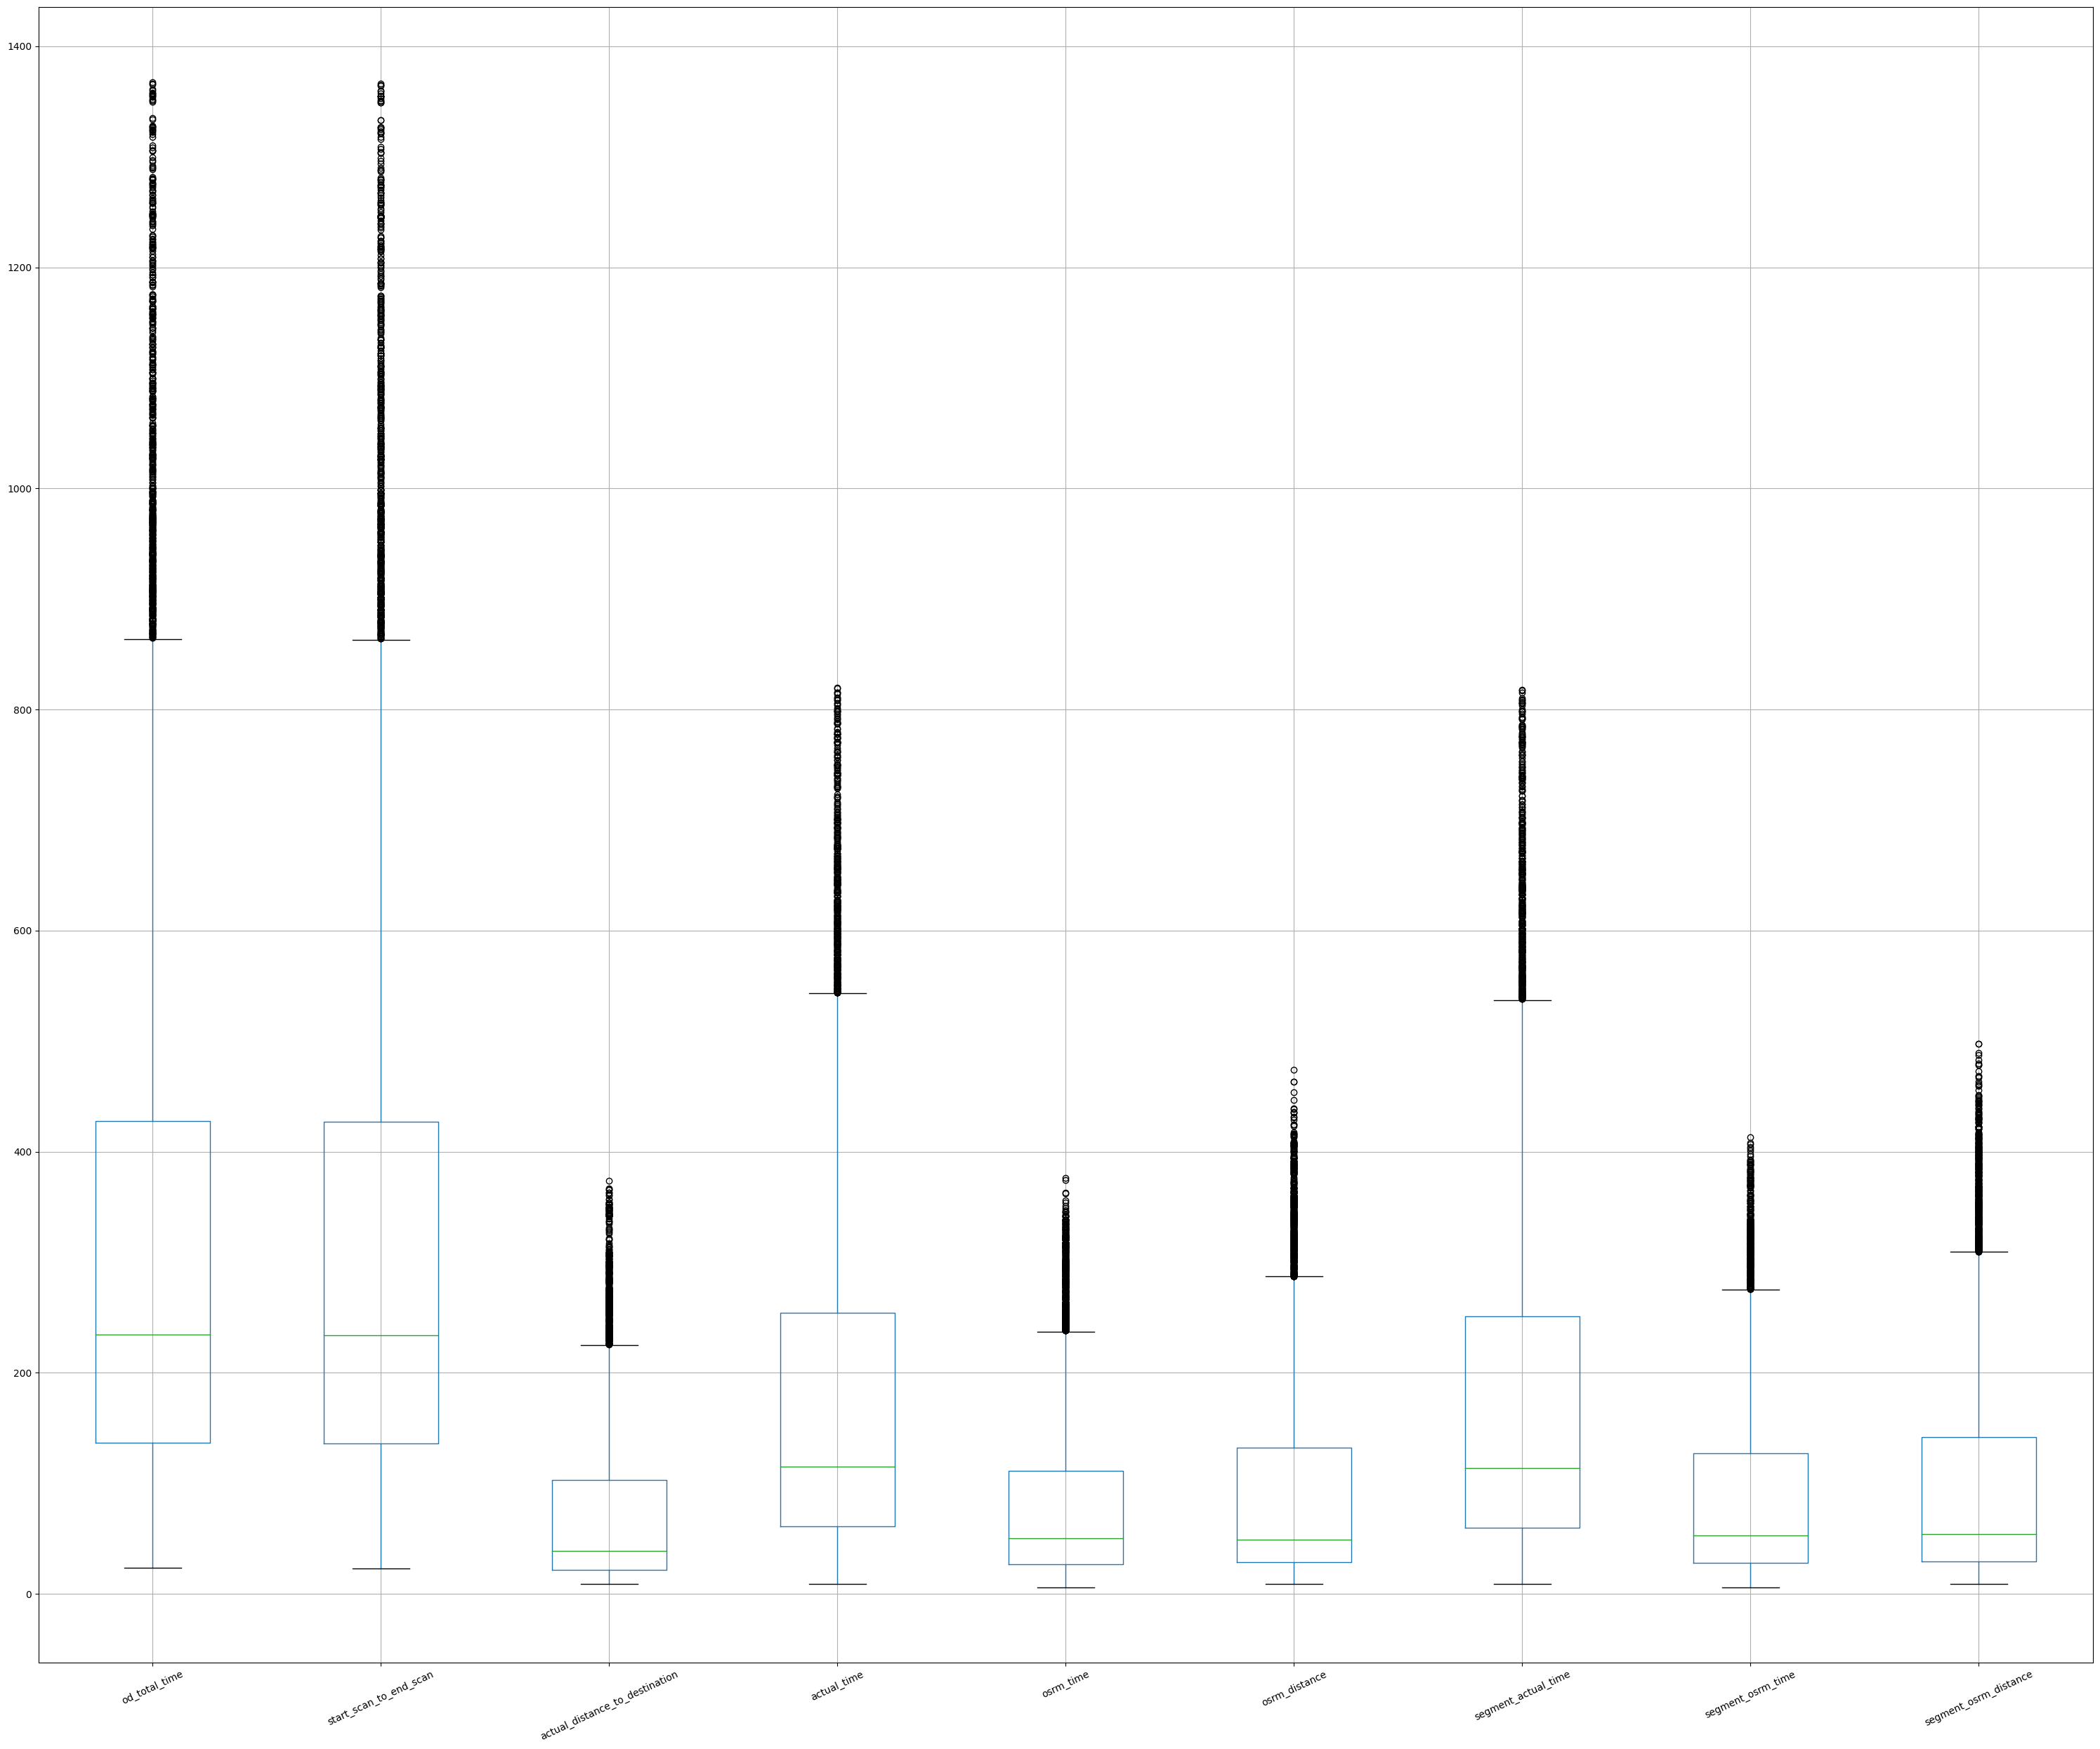

In [ ]:
# After IQR - Plotting boxplots again for numerical features to visualize outliers
plt.figure(figsize=(30, 25))

# for i, col in enumerate(numerical_features, 1):
#     plt.subplot(3, 3, i)
#     sns.boxplot(y=fe_no_outliers[col])
#     plt.title(col)

fe_no_outliers[numerical_features].boxplot(rot=25, figsize=(35,20))
plt.tight_layout()
plt.show()

After we handled the outliers using IQR method, we can see most outliers are removed as evident in the graph

[]

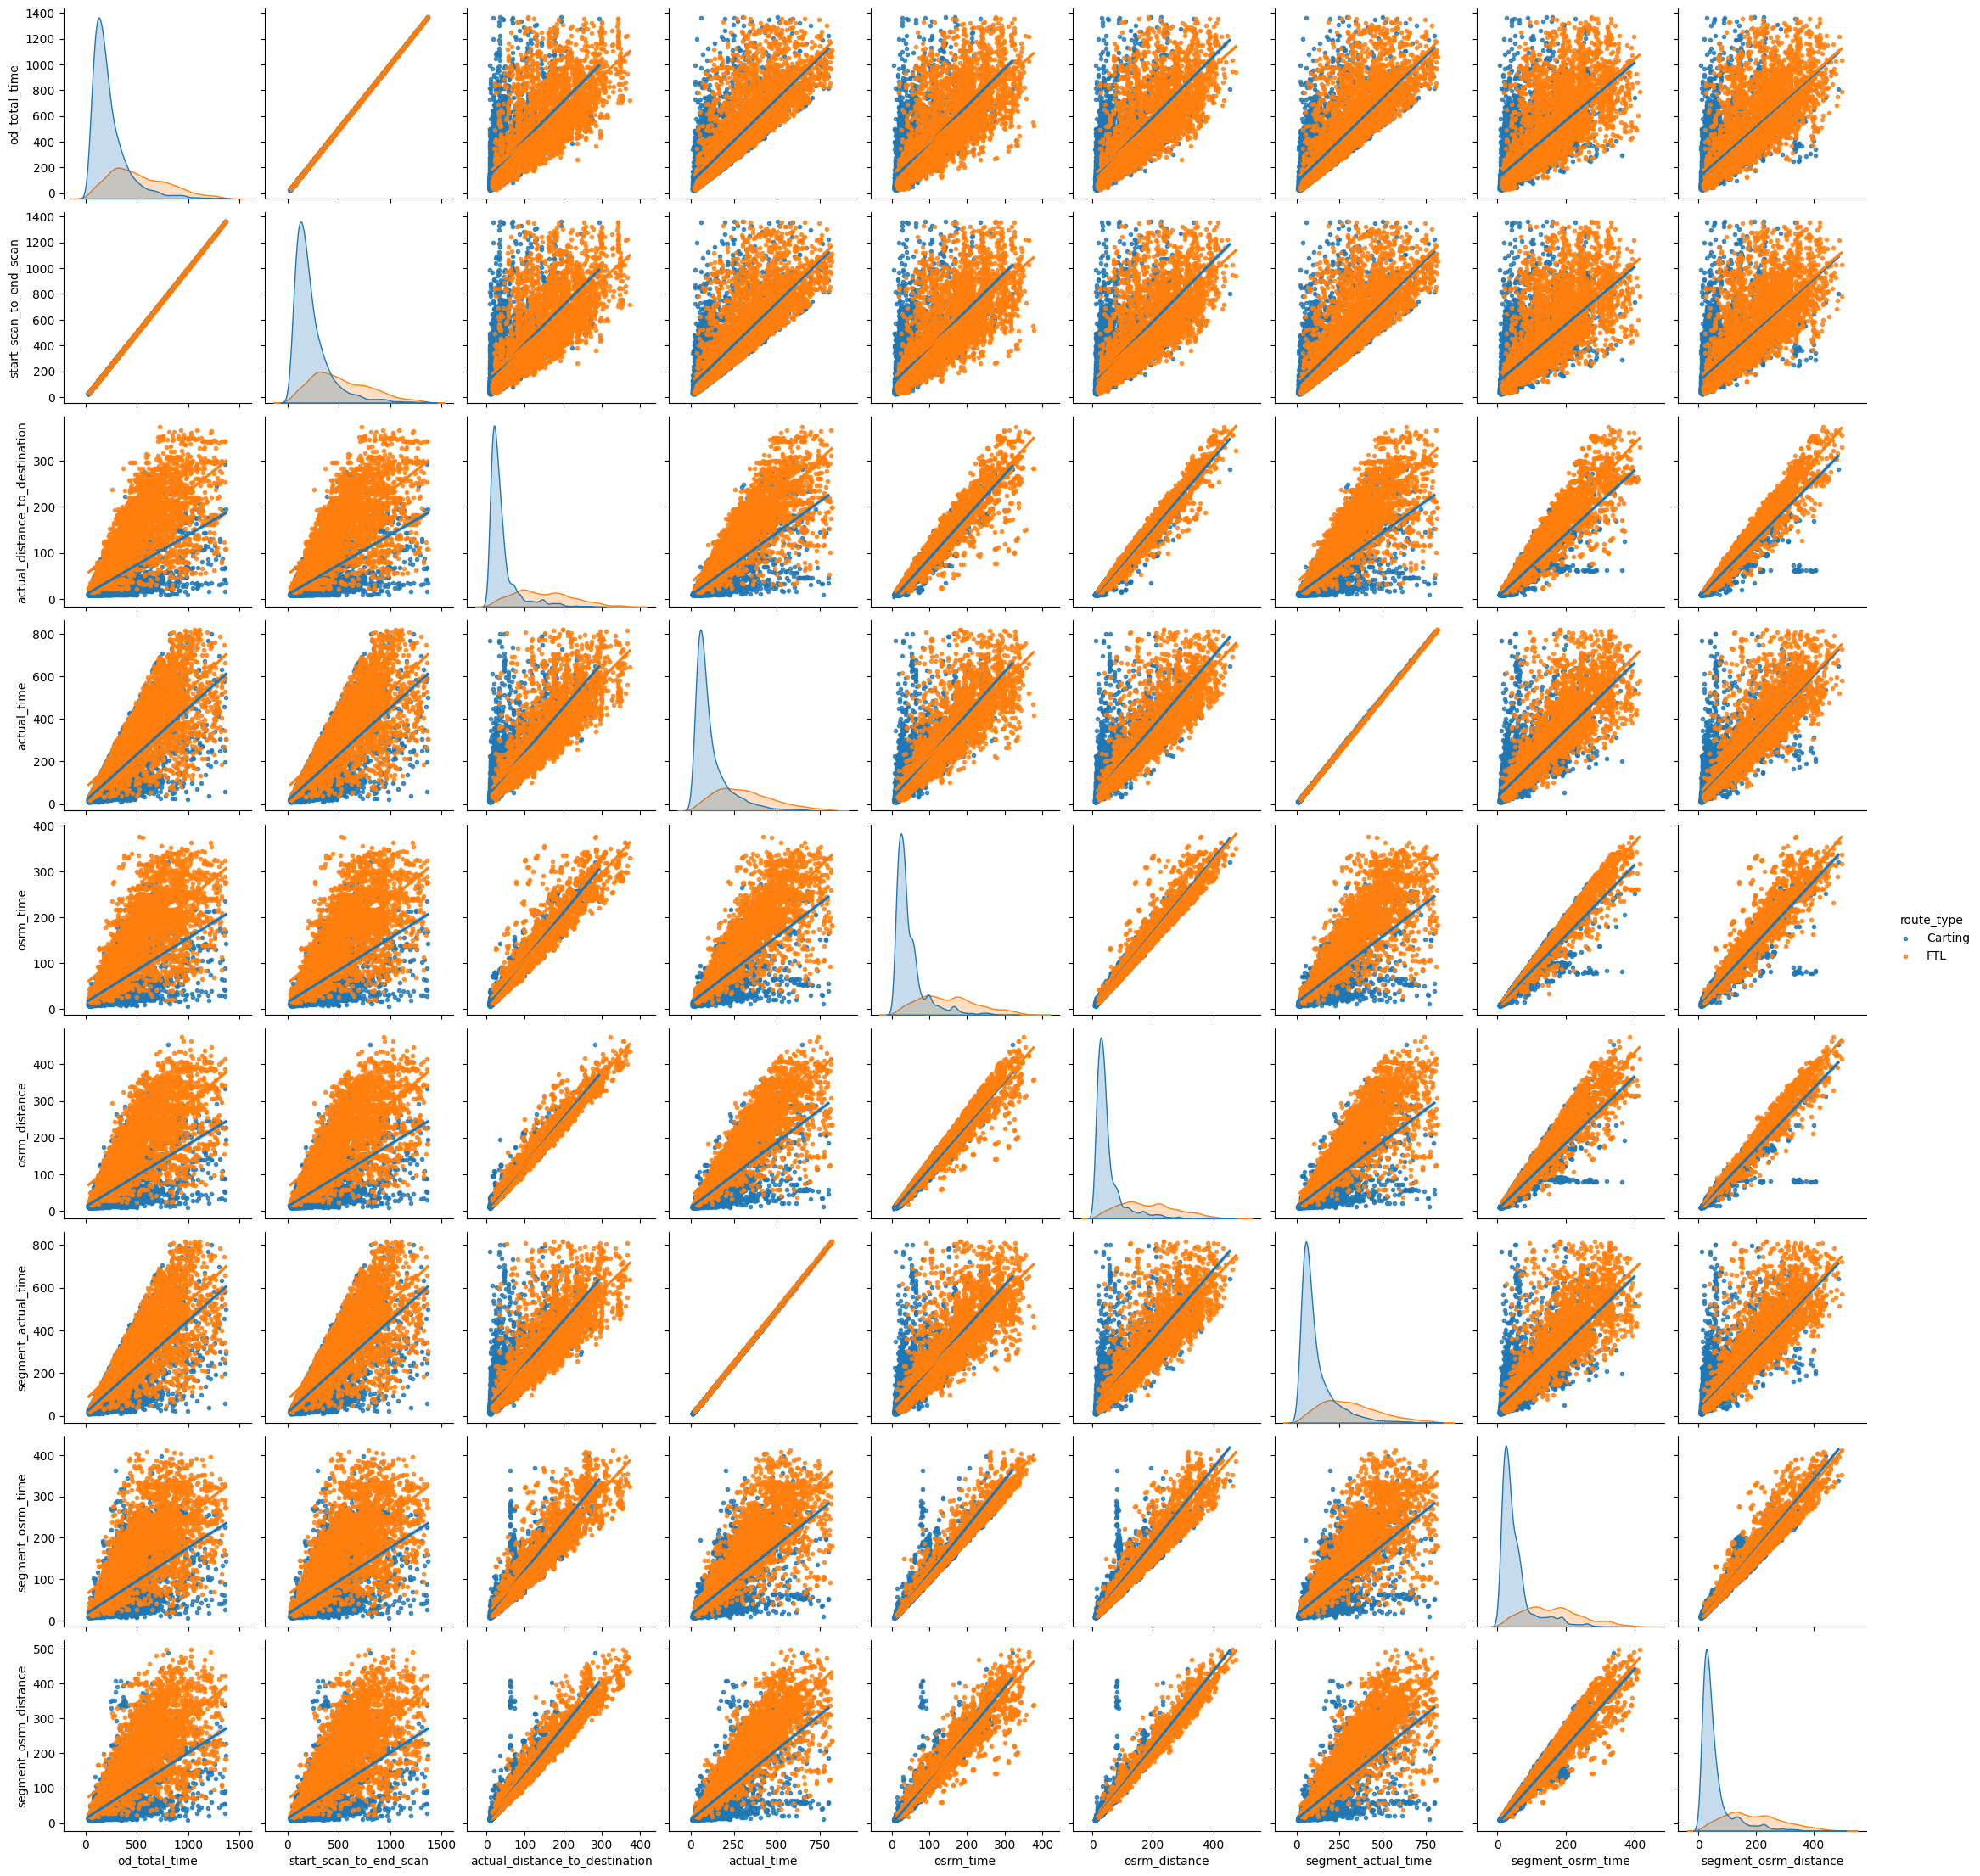

In [ ]:
sns.pairplot(data = fe_no_outliers,
             vars = numerical_features,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [ ]:
fe_corr = fe_no_outliers[numerical_features].corr()
fe_corr

od_total_time  start_scan_to_end_scan  \
od_total_time                        1.000000                0.999997   
start_scan_to_end_scan               0.999997                1.000000   
actual_distance_to_destination       0.758645                0.758186   
actual_time                          0.829296                0.828989   
osrm_time                            0.762512                0.761976   
osrm_distance                        0.769243                0.768770   
segment_actual_time                  0.828951                0.828646   
segment_osrm_time                    0.740551                0.740076   
segment_osrm_distance                0.756370                0.755942   

                                actual_distance_to_destination  actual_time  \
od_total_time                                         0.758645     0.829296   
start_scan_to_end_scan                                0.758186     0.828989   
actual_distance_to_destination                        1.000000     0.856127   
actual_time                                           0.856127     1.000000   
osrm_time                                             0.963100     0.860077   
osrm_distance                                         0.985810     0.872019   
segment_actual_time                                   0.854005     0.999961   
segment_osrm_time                                     0.933967     0.845850   
segment_osrm_distance                                 0.967300     0.865370   

                                osrm_time  osrm_distance  segment_actual_time  \
od_total_time                    0.762512       0.769243             0.828951   
start_scan_to_end_scan           0.761976       0.768770             0.828646   
actual_distance_to_destination   0.963100       0.985810             0.854005   
actual_time                      0.860077       0.872019             0.999961   
osrm_time                        1.000000       0.981876             0.858181   
osrm_distance                    0.981876       1.000000             0.870092   
segment_actual_time              0.858181       0.870092             1.000000   
segment_osrm_time                0.973129       0.955326             0.843862   
segment_osrm_distance            0.963370       0.979686             0.863321   

                                segment_osrm_time  segment_osrm_distance  
od_total_time                            0.740551               0.756370  
start_scan_to_end_scan                   0.740076               0.755942  
actual_distance_to_destination           0.933967               0.967300  
actual_time                              0.845850               0.865370  
osrm_time                                0.973129               0.963370  
osrm_distance                            0.955326               0.979686  
segment_actual_time                      0.843862               0.863321  
segment_osrm_time                        1.000000               0.973643  
segment_osrm_distance                    0.973643               1.000000

[]

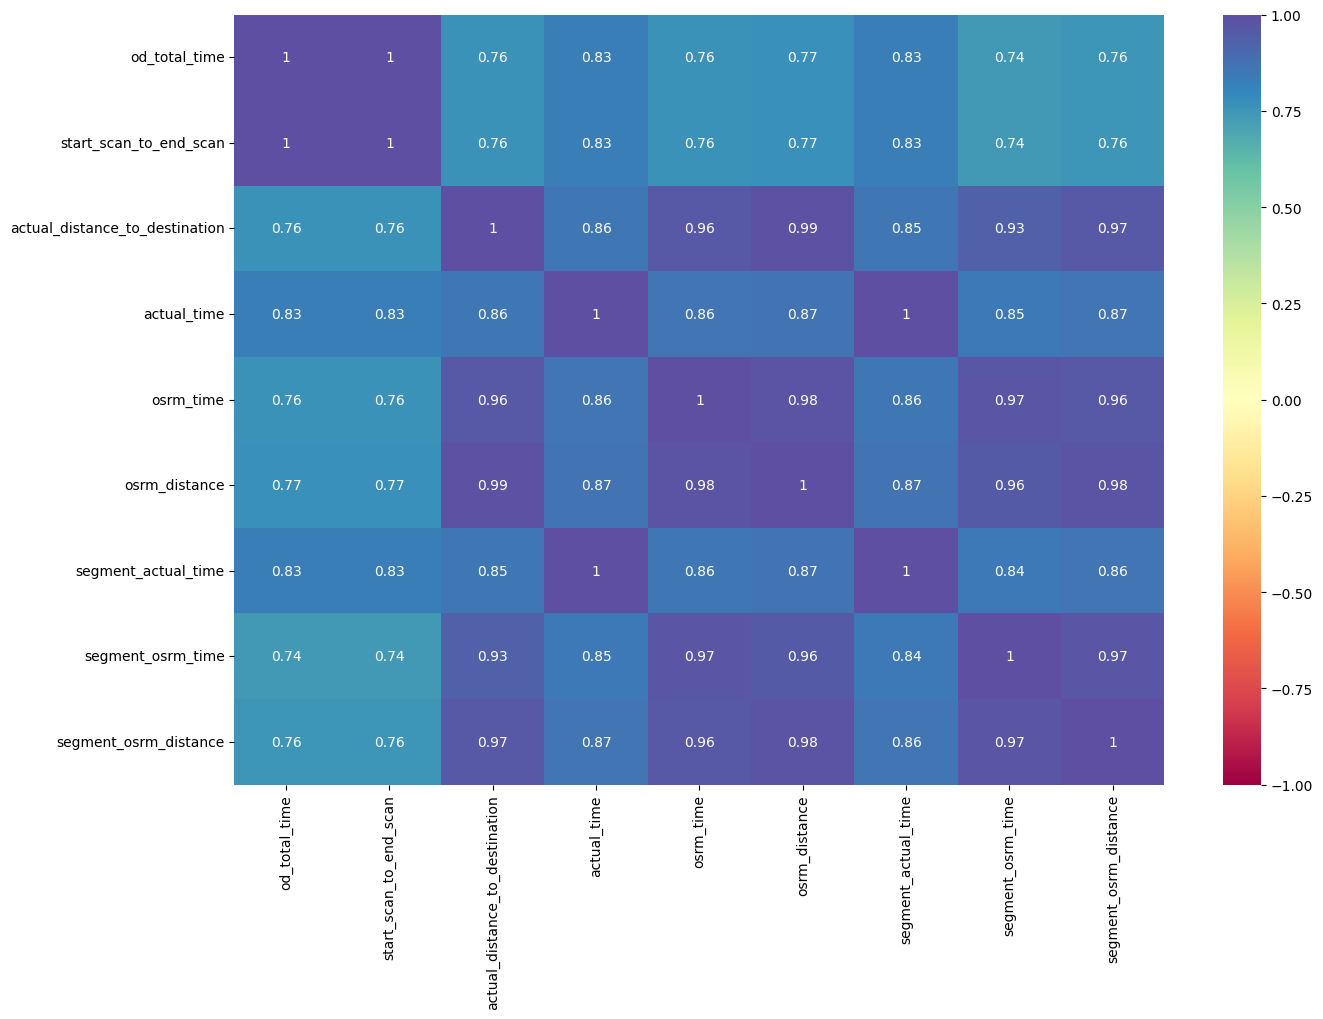

In [ ]:
# Plotting a Heatmap for correlation.

plt.figure(figsize = (15, 10))
sns.heatmap(data = fe_corr, vmin = -1, vmax = 1, annot = True, cmap=sns.color_palette("Spectral", as_cmap=True))
plt.plot()

Very high correlation exists between all the columns.

# One-hot encoding

In [ ]:
# Selecting categorical features for one-hot encoding
categorical_features = ['route_type', 'data',
                        'destination_city', 'destination_state',
                        'source_city', 'source_state', 'source_place', 'destination_place']

# Applying one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(fe[categorical_features])

# Converting the encoded features back to a dataframe
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_features))

encoded_categorical_df

route_type_Carting  route_type_FTL  data_test  data_training  \
0                     0.0             1.0        0.0            1.0   
1                     1.0             0.0        0.0            1.0   
2                     0.0             1.0        0.0            1.0   
3                     1.0             0.0        0.0            1.0   
4                     0.0             1.0        0.0            1.0   
...                   ...             ...        ...            ...   
14812                 1.0             0.0        1.0            0.0   
14813                 1.0             0.0        1.0            0.0   
14814                 1.0             0.0        1.0            0.0   
14815                 1.0             0.0        1.0            0.0   
14816                 0.0             1.0        1.0            0.0   

       destination_city_Achrol  destination_city_Addanki  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
14812                      0.0                       0.0   
14813                      0.0                       0.0   
14814                      0.0                       0.0   
14815                      0.0                       0.0   
14816                      0.0                       0.0   

       destination_city_Agartala  destination_city_Agra  \
0                            0.0                    0.0   
1                            0.0                    0.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   
...                          ...                    ...   
14812                        0.0                    0.0   
14813                        0.0                    0.0   
14814                        0.0                    0.0   
14815                        0.0                    0.0   
14816                        0.0                    0.0   

       destination_city_Ahmedabad  destination_city_Aizawl  \
0                             0.0                      0.0   
1                             0.0                      0.0   
2                             0.0                      0.0   
3                             0.0                      0.0   
4                             0.0                      0.0   
...                           ...                      ...   
14812                         0.0                      0.0   
14813                         0.0                      0.0   
14814                         0.0                      0.0   
14815                         0.0                      0.0   
14816                         0.0                      0.0   

       destination_city_Ajmer  destination_city_Akbarpur  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
...                       ...                        ...   
14812                     0.0                        0.0   
14813                     0.0                        0.0   
14814                     0.0                        0.0   
14815                     0.0                        0.0   
14816                     0.0                        0.0   

       destination_city_Akhnoor  destination_city_Akola  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                     

# Normalize/Standardize the numerical features

In [ ]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(fe[numerical_features])

# Converting the scaled features back to a dataframe
min_max_scaled_numerical_df = pd.DataFrame(min_max_scaled_numerical, columns=numerical_features)

min_max_scaled_numerical_df

od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
0           0.284016                0.283937                        0.374613   
1           0.020082                0.019937                        0.029476   
2           0.496617                0.496508                        0.880999   
3           0.009782                0.009778                        0.003753   
4           0.088239                0.088127                        0.054395   
...              ...                     ...                             ...   
14812       0.029786                0.029714                        0.022392   
14813       0.004715                0.004698                        0.002990   
14814       0.050623                0.050540                        0.013631   
14815       0.041276                0.041143                        0.057736   
14816       0.042024                0.041905                        0.026213   

       actual_time  osrm_time  osrm_distance  segment_actual_time  \
0         0.248242   0.350938       0.346972             0.247388   
1         0.021419   0.030602       0.026859             0.021218   
2         0.533568   0.855874       0.828325             0.530301   
3         0.007992   0.004442       0.003747             0.008037   
4         0.053069   0.054788       0.048647             0.053207   
...            ...        ...            ...                  ...   
14812     0.011829   0.027641       0.022745             0.011734   
14813     0.001918   0.002962       0.002478             0.001929   
14814     0.043638   0.020731       0.017602             0.043723   
14815     0.040761   0.085390       0.057237             0.040026   
14816     0.042519   0.030602       0.025258             0.042598   

       segment_osrm_time  segment_osrm_distance  
0               0.391712               0.373134  
1               0.023065               0.021373  
2               0.756450               0.721625  
3               0.003909               0.003074  
4               0.042611               0.039185  
...                  ...                    ...  
14812           0.021892               0.015872  
14813           0.001955               0.001996  
14814           0.032056               0.027262  
14815           0.084050               0.061020  
14816           0.023847               0.020346  

[14817 rows x 9 columns]

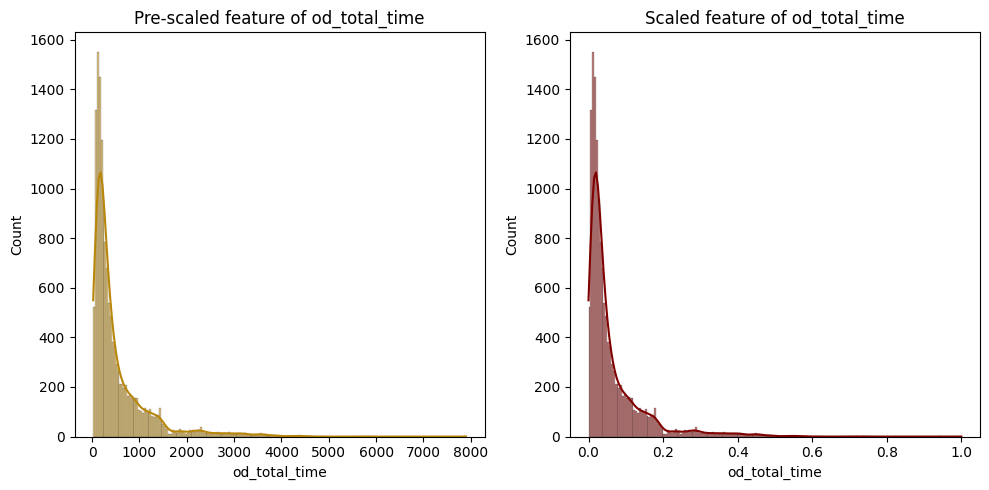

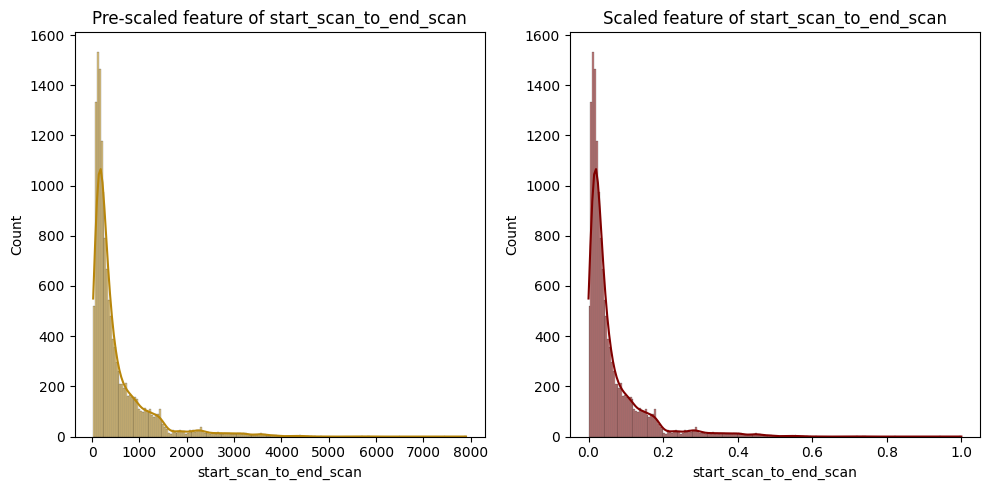

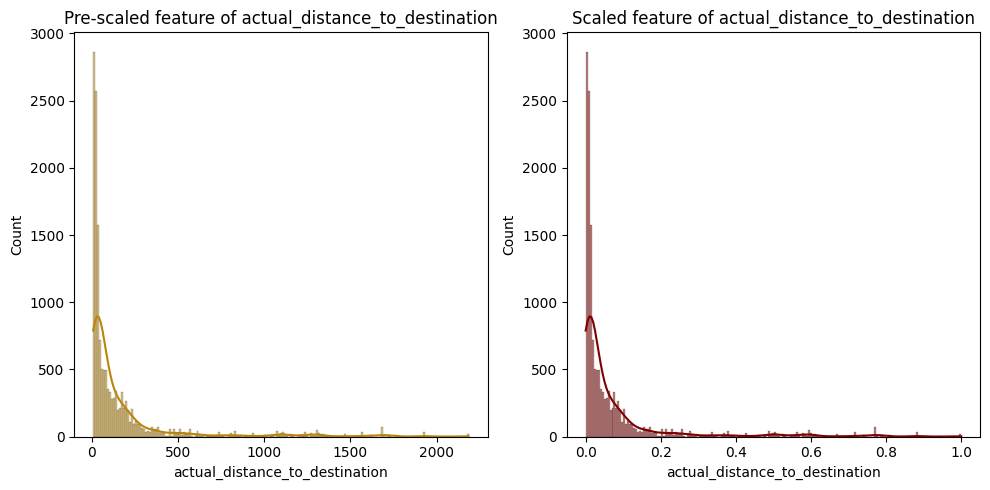

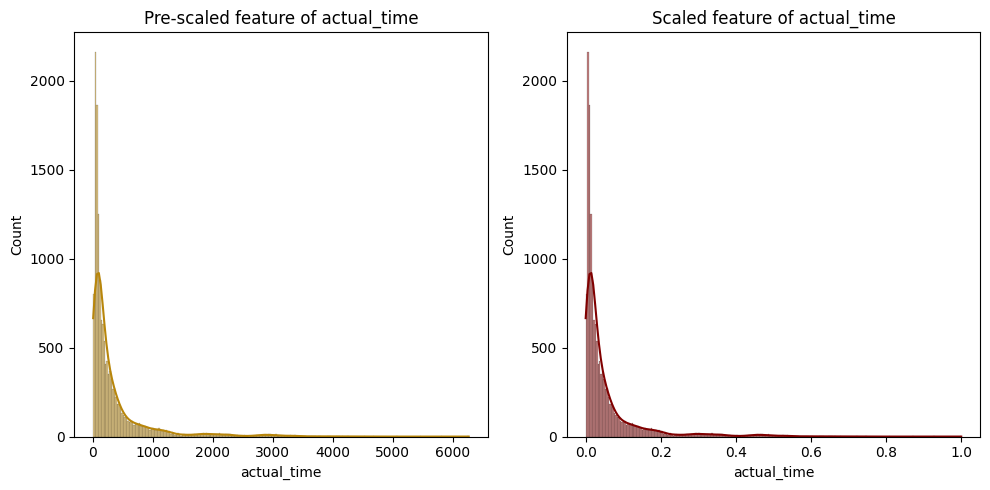

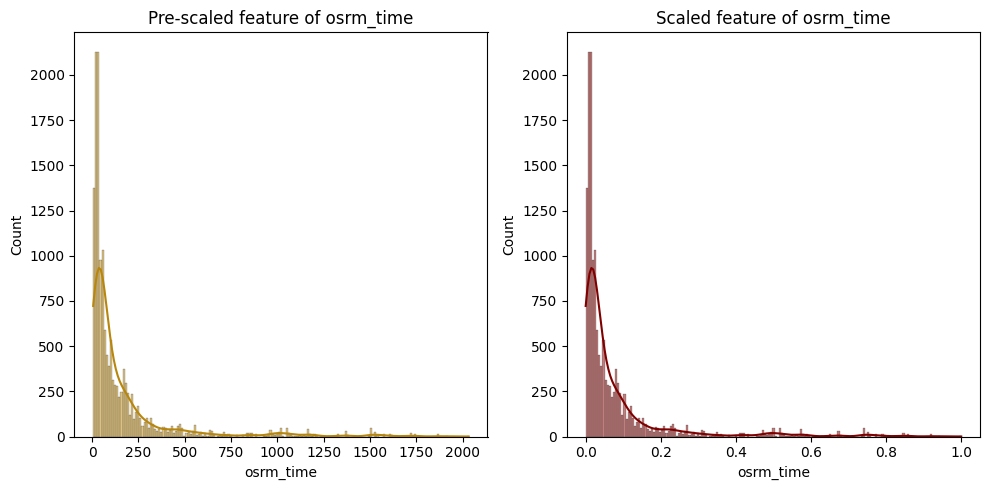

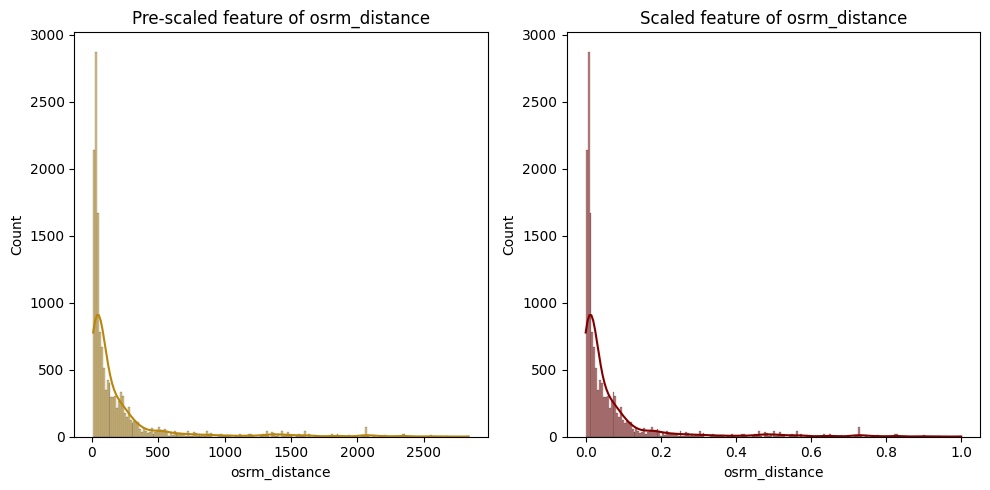

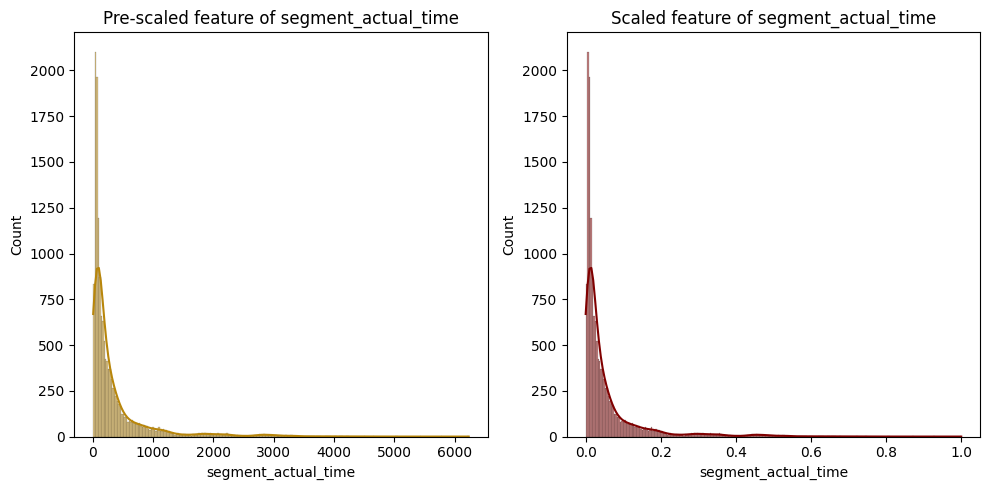

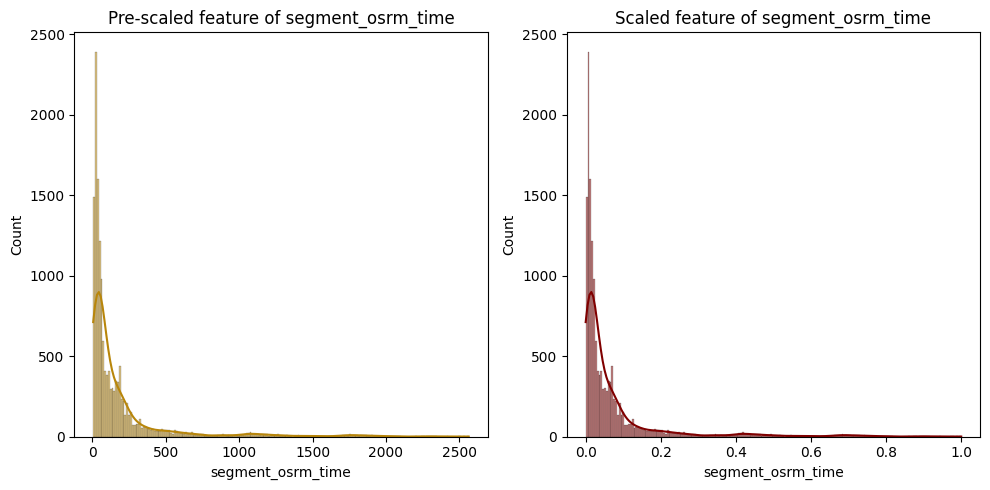

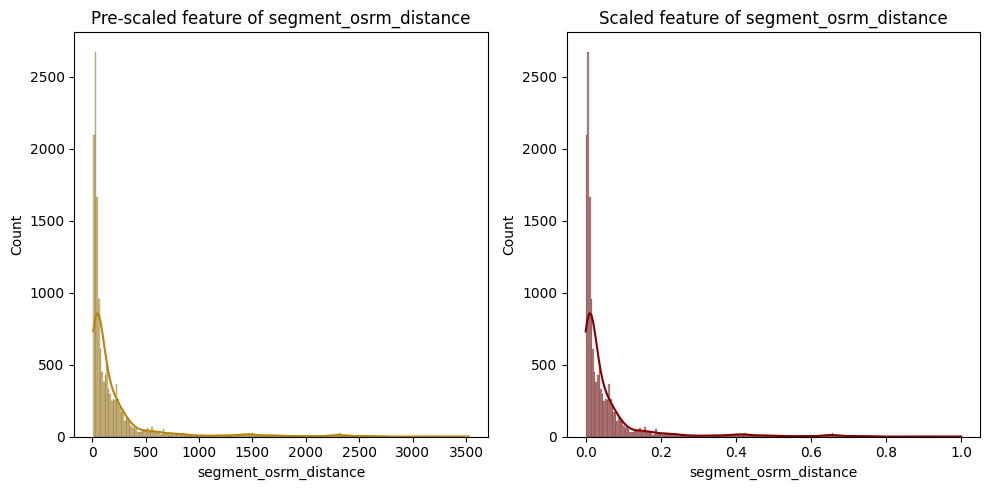

In [ ]:
# Plot of MinxMax scaling v/s pre-scaling
for i in numerical_features:
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  axes[0].set_title(f"Pre-scaled feature of {i}")
  sns.histplot(fe[i], ax = axes[0], kde=True, color = 'darkgoldenrod')
  axes[1].set_title(f"Scaled feature of {i}")
  sns.histplot(min_max_scaled_numerical_df[i], ax= axes[1], kde=True, color = "maroon")
  plt.tight_layout()
  plt.show()

We can clearly see that the values have been scaled between 0 to 1.

In [ ]:
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled_numerical = std_scaler.fit_transform(fe[numerical_features])

# Converting the scaled features back to a dataframe
std_scaled_numerical_df = pd.DataFrame(std_scaled_numerical, columns=numerical_features)

std_scaled_numerical_df

od_total_time  start_scan_to_end_scan  actual_distance_to_destination  \
0           2.621986                2.623702                        2.162092   
1          -0.531255               -0.532593                       -0.298944   
2           5.161957                5.165134                        5.772935   
3          -0.654316               -0.654047                       -0.482362   
4           0.283017                0.282670                       -0.121257   
...              ...                     ...                             ...   
14812      -0.415325               -0.415693                       -0.349454   
14813      -0.714854               -0.714774                       -0.487802   
14814      -0.166386               -0.166711                       -0.411926   
14815      -0.278053               -0.279057                       -0.097433   
14816      -0.269111               -0.269947                       -0.322212   

       actual_time  osrm_time  osrm_distance  segment_actual_time  \
0         2.146251   2.047585       2.124848             2.146791   
1        -0.381461  -0.344144      -0.321920            -0.382742   
2         5.325931   5.817598       5.804050             5.310954   
3        -0.531093  -0.539462      -0.498578            -0.530163   
4        -0.028757  -0.163566      -0.155387            -0.024976   
...            ...        ...            ...                  ...   
14812    -0.488341  -0.366255      -0.353368            -0.488813   
14813    -0.598784  -0.550518      -0.508275            -0.598480   
14814    -0.133856  -0.417849      -0.392677            -0.131047   
14815    -0.165920   0.064919      -0.089730            -0.172397   
14816    -0.146325  -0.344144      -0.334157            -0.143632   

       segment_osrm_time  segment_osrm_distance  
0               2.629468               2.633784  
1              -0.368643              -0.333670  
2               5.595785               5.573660  
3              -0.524430              -0.488040  
4              -0.209676              -0.183405  
...                  ...                    ...  
14812          -0.378181              -0.380078  
14813          -0.540327              -0.497133  
14814          -0.295518              -0.283991  
14815           0.127333               0.000795  
14816          -0.362284              -0.342337  

[14817 rows x 9 columns]

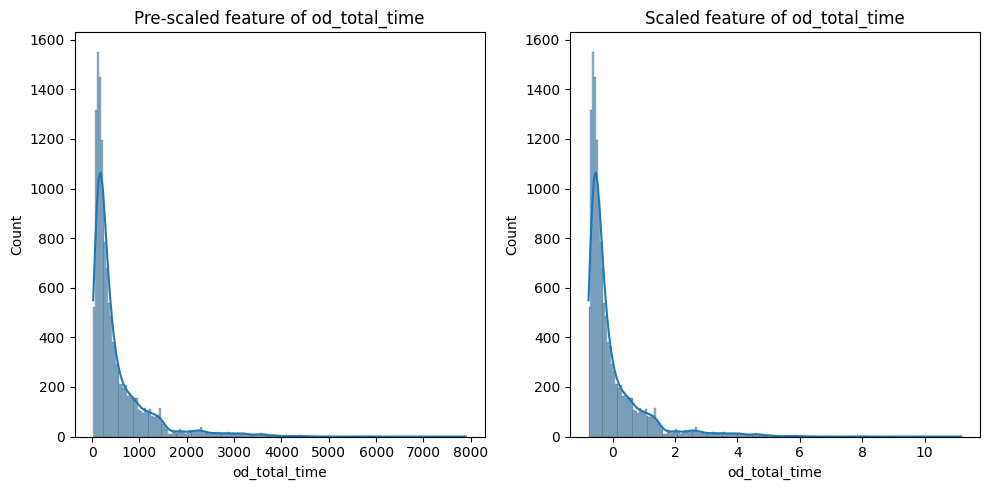

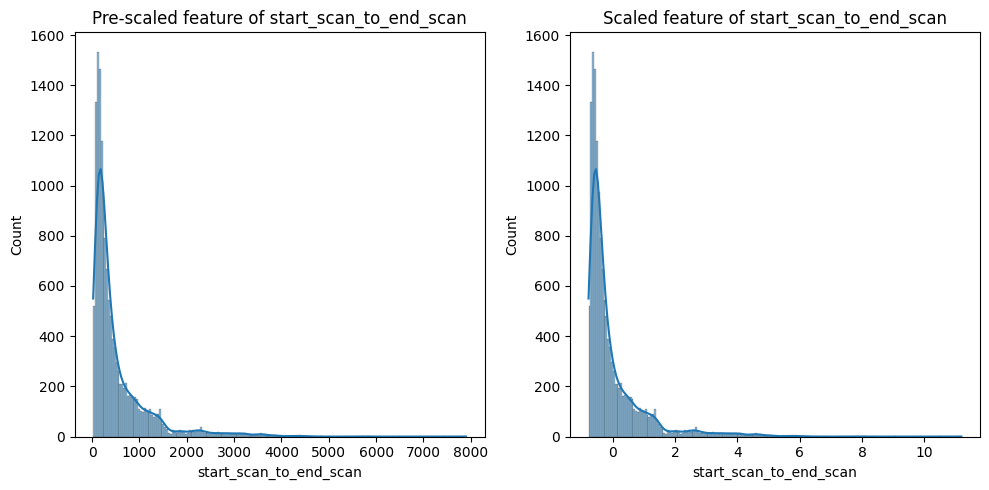

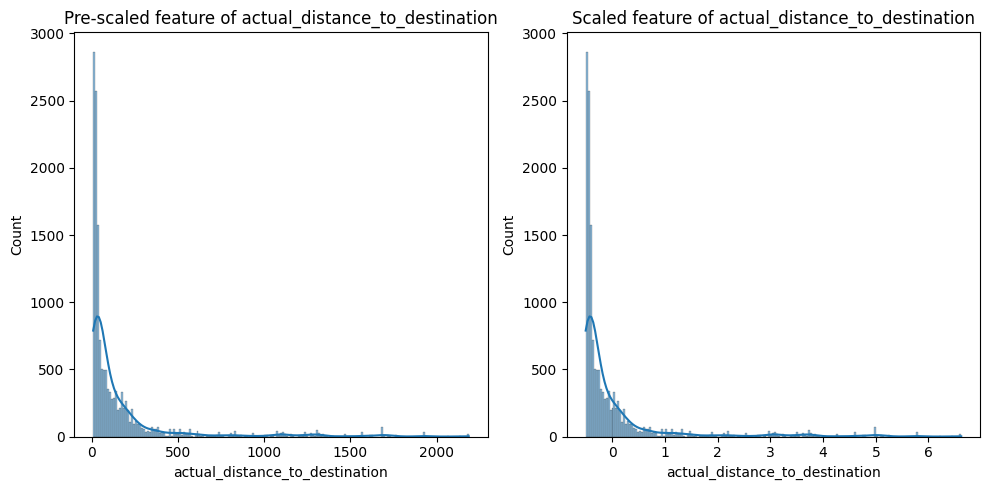

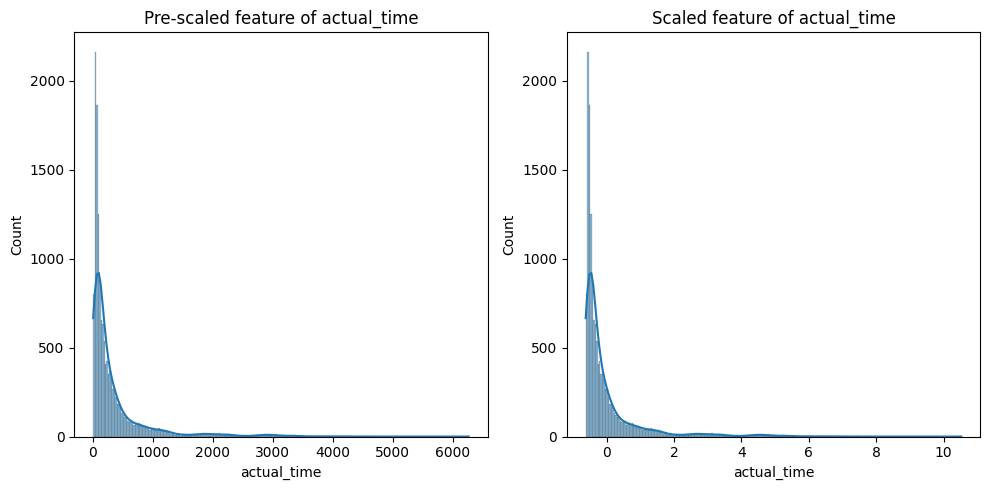

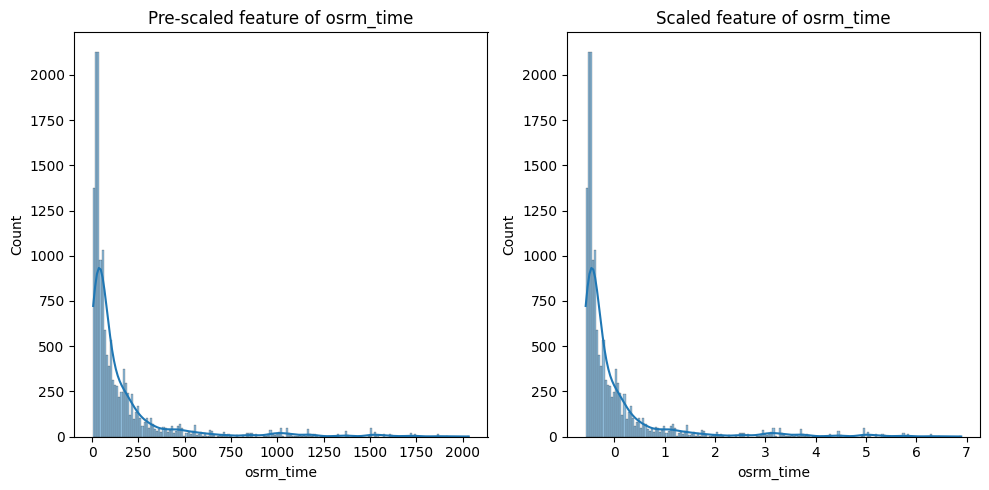

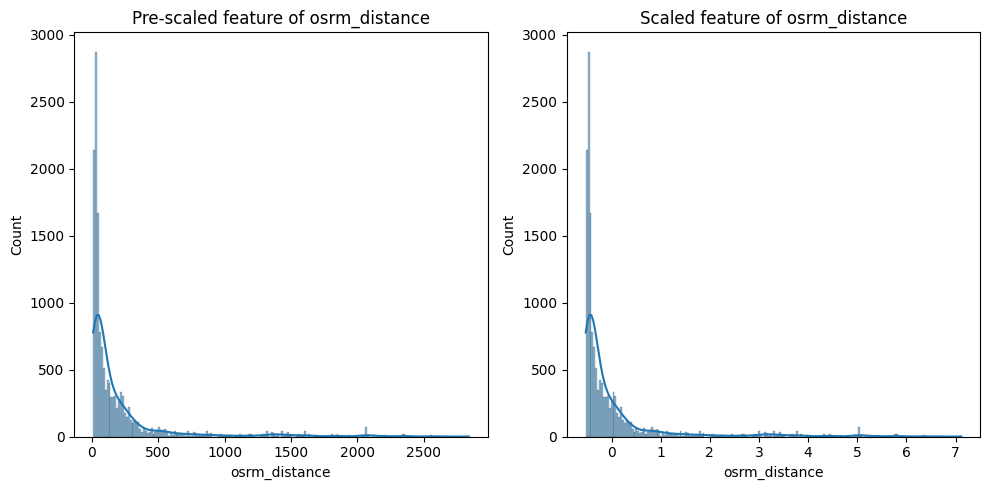

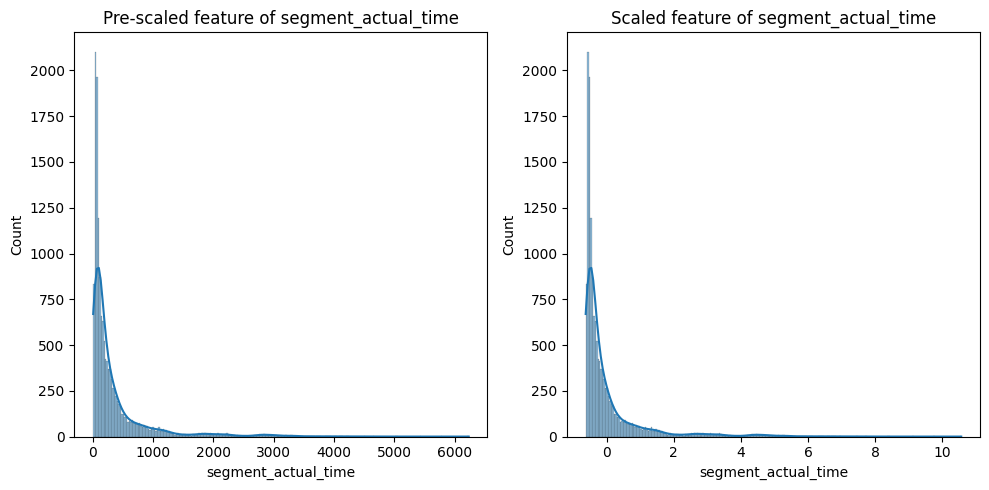

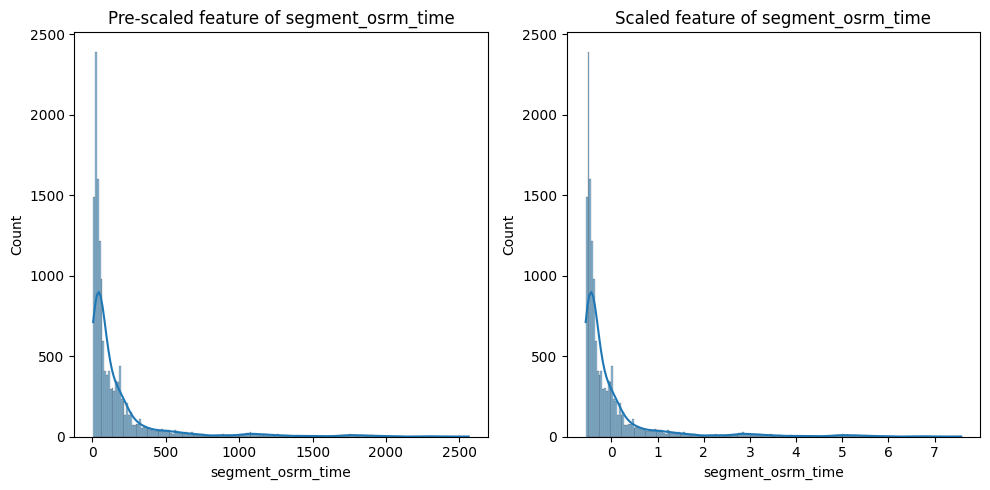

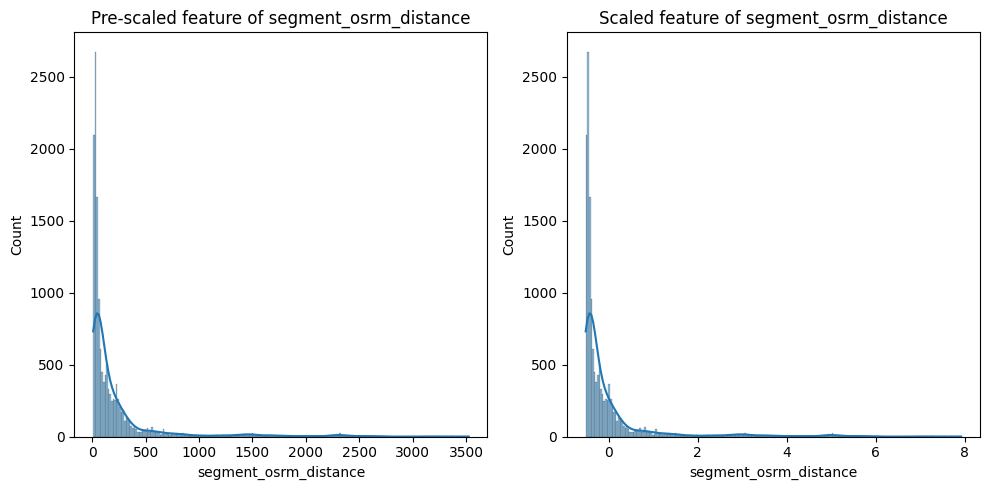

In [ ]:
# Plot of Standard scaling v/s pre-scaling
for i in numerical_features:
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  axes[0].set_title(f"Pre-scaled feature of {i}")
  sns.histplot(fe[i], ax = axes[0], kde=True)
  axes[1].set_title(f"Scaled feature of {i}")
  sns.histplot(std_scaled_numerical_df[i], ax= axes[1], kde=True)
  plt.tight_layout()
  plt.show()

In [ ]:
# Combining the encoded and scaled features with the rest of the dataset
processed_data = pd.concat([fe.drop(categorical_features + numerical_features, axis=1),
                            encoded_categorical_df, min_max_scaled_numerical_df], axis=1)
processed_data

trip_uuid         trip_creation_time  \
0      trip-153671041653548748 2018-09-12 00:00:16.535741   
1      trip-153671042288605164 2018-09-12 00:00:22.886430   
2      trip-153671043369099517 2018-09-12 00:00:33.691250   
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
4      trip-153671052974046625 2018-09-12 00:02:09.740725   
...                        ...                        ...   
14812  trip-153861095625827784 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424 2018-10-03 23:59:42.701692   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14812                     82.0                   62.0   
14813                     21.0                   11.0   
14814                    281.0                   88.0   
14815                    258.0                  221.0   
14816                    274.0                   67.0   

       segment_osrm_distance_sum  trip_creation_month  trip_creation_year  \
0                    1320.473267                    9                2018   
1                      84.189400                    9                2018   
2                    2545.267822                    9                2018   
3                      19.876600                    9                2018   
4                     146.791901                    9                2018   
...                          ...                  ...                 ...   
14812                  64.855103                   10                2018   
14813                  16.088299                   10                2018   
14814                 104.886597                   10                2018   
14815                 223.532394                   10                2018   
14816                  80.578705                   10                2018   

       trip_creation_day  trip_creation_hour  trip_creation_weekday  \
0                     12                   0                      2   
1                     12                   0                      2   
2                     12                   0                      2   
3                     12                   0                      2   
4                     12                   0                      2   
...                  ...                 ...                    ...   
14812                  3                  23                      2   
14813                  3                  23                      2   
14814                  3                  23                      2   
14815                  3                  23                      2   
14816                  3                  23                      2   

       trip_creation_week  route_type_Carting  route_type_FTL  data_test  \
0                      37                 0.0             1.0        0.0   
1                      37                 1.0             0.0        0.0   
2                      37                 0.0             1.0        0.0   
3                      37                 1.0             0.0        0.0   
4                      37                 0.0             1.0        0.0   
...                   ...                 ...             ...        ...   
14812                  40                 1.0             0.0        1.0   
14813                  40                 1.0             0.0        1.0   
14814                  40                 1.0             0.0        1.0   
14815                  40                 1.0             0.0    

# Hypothesis Testing

# Perform hypothesis testing / visual analysis between

Step 1. State Null Hypothesis
 - Null Hypothesis: The actual value and supposed value are same.
 - Alternate Hypothesis: The actual value and supposed value are different.

Step 2. Check for basic assumptions
 - Distribution check using **QQ Plot**
 - Test for Normality using **Shapiro-Wilk** or **Kolmogorov-Smirnov** test
 - Homogeneity of Variances using **Levene's test**

Step 3. Define Test statistics; Distribution of T under H0.
 - For comparing independent samples: If t-test assumptions hold, we will go for it. Else, we can choose the non-parametric Mann-Whitney U test for its robustness.

Step 4. Compute the p-value and fix value of alpha.
 - We will set the alpha value as .05

Step 5. Compare p-value and alpha.
 - If p_value < alpha : **Reject H0**
 - If p_value > alpha : **Accept H0**

In [ ]:
alpha = .05

# Creating generic functions to be used

def plot_qq(i,j):
  plt.figure(figsize = (15, 6))
  plt.subplot(1, 2, 1)
  plt.suptitle(f"QQ plots for {i} and {j}")
  stats.probplot(fe[i], plot = plt, dist = 'norm')
  plt.title(f"QQ of {i}")
  plt.subplot(1, 2, 2)
  stats.probplot(fe[j], plot = plt, dist = 'norm')
  plt.title(f"QQ of {j}")
  plt.tight_layout()
  plt.show()

def test_shapiro_wilk(i):
  # Point to remember: Shapiro-Wilk is basically for smaller sample size.
  # Ho : Sample follows Normal distribution
  # Ha : Sample doesn't follow Normal
  sw_test_stat, p_value = stats.shapiro(fe[i].sample(5000))
  print('SW p-value :', p_value)
  if p_value < alpha:
      print(f"Shapiro-Wilk Test: The {i} sample does NOT follow normal distribution")
  else:
      print(f"Shapiro-Wilk Test: The {i} sample follows normal distribution")

def ks_test(i):
  # Point to remember: Kolmogorov-Smirnov test is basically for larger sample size.
  # Ho : Sample follows Normal distribution
  # Ha : Sample doesn't follow Normal distribution

  ks_test_stat, p_value = stats.kstest(fe[i], 'norm')
  print('KS p-value :', p_value)
  if p_value < alpha:
      print(f"Kolmogorov-Smirnov Test: The {i} sample does NOT follow normal distribution")
  else:
      print(f"Kolmogorov-Smirnov Test: The {i} sample follows normal distribution")

def levenes_test(i,j):
  # Ho: Variances are equal
  # Ha: Variances are not homogenous

  levene_stat, p_value = stats.levene(fe[i], fe[j])
  print('Levene p-value :', p_value)
  if p_value < alpha:
      print(f"Levene's Test: The samples {i} and {j} does NOT suggest equal variances")
  else:
      print(f"Levene's Test: The samples {i} and {j} suggest equal variances.")

def mann_whitney_u_test(i,j):
  # Point to note: We are doing with the default alternative which is two-sided

  # Ho: Both the samples have the same median
  # Ha: The samples have different median and thus differs

  m_w_u_stat, p_value = stats.mannwhitneyu(fe[i],fe[j])
  if p_value < alpha:
      print(f"Mann-Whitney U Test: The samples {i} and {j} are different")
  else:
      print(f"Mann-Whitney U Test: The samples {i} and {j} are similiar.")

**Actual_time aggregated value and OSRM time aggregated value.**

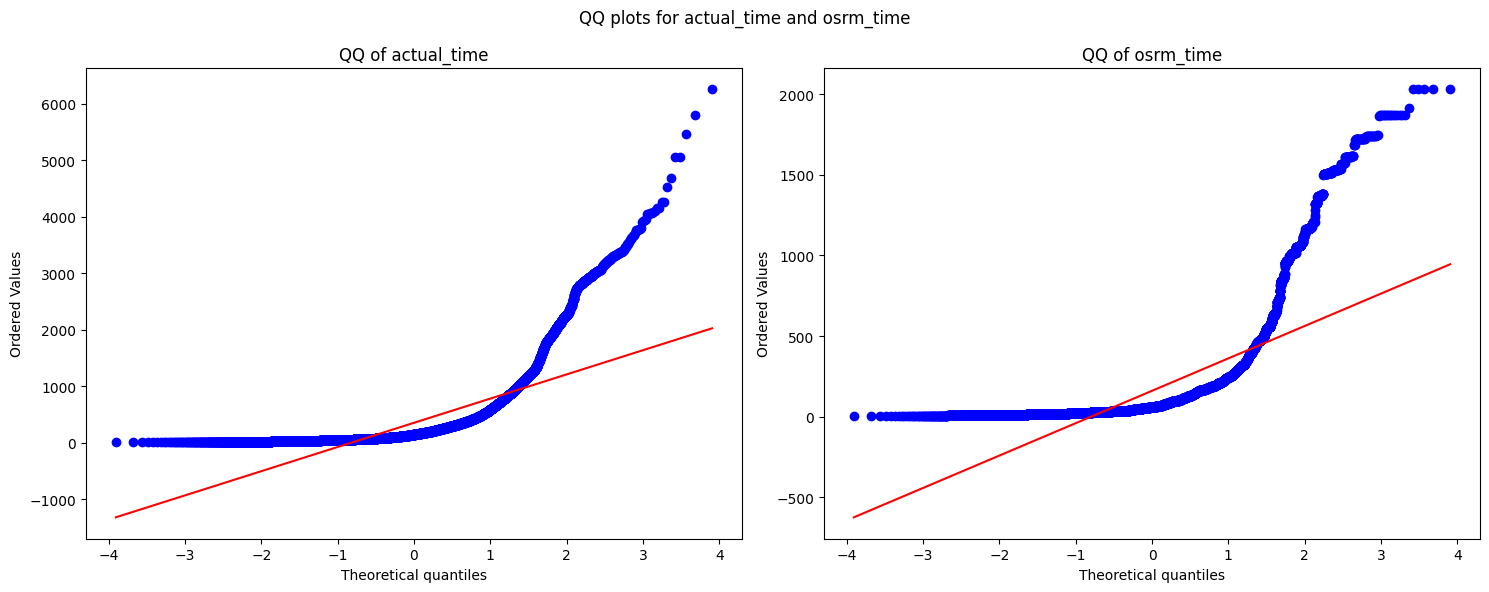

SW p-value : 0.0
Shapiro-Wilk Test: The actual_time sample does NOT follow normal distribution
SW p-value : 0.0
Shapiro-Wilk Test: The osrm_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The actual_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The osrm_time sample does NOT follow normal distribution
Levene p-value : 1.871098057987424e-220
Levene's Test: The samples actual_time and osrm_time does NOT suggest equal variances


In [ ]:
# We believe both the columns are same unless proved otherwise by the hypothesis testing

# Tests for normality and homogenity of the samples.

a51 = 'actual_time'
a52 = 'osrm_time'

plot_qq(a51,a52)
test_shapiro_wilk(a51)
test_shapiro_wilk(a52)
ks_test(a51)
ks_test(a52)
levenes_test(a51,a52)

In [ ]:
# Since the samples do not follow normal distribution and also does not have equal variances, we'll proceed with Mann-Whitney U test.

mann_whitney_u_test(a51,a52)

Mann-Whitney U Test: The samples actual_time and osrm_time are different


**Conclusion**:

- The columns actual_time and osrm_time do not follow normal distribution and have different variances.
- The columns actual_time and osrm_time are different.

**Actual_time aggregated value and segment actual time aggregated value**

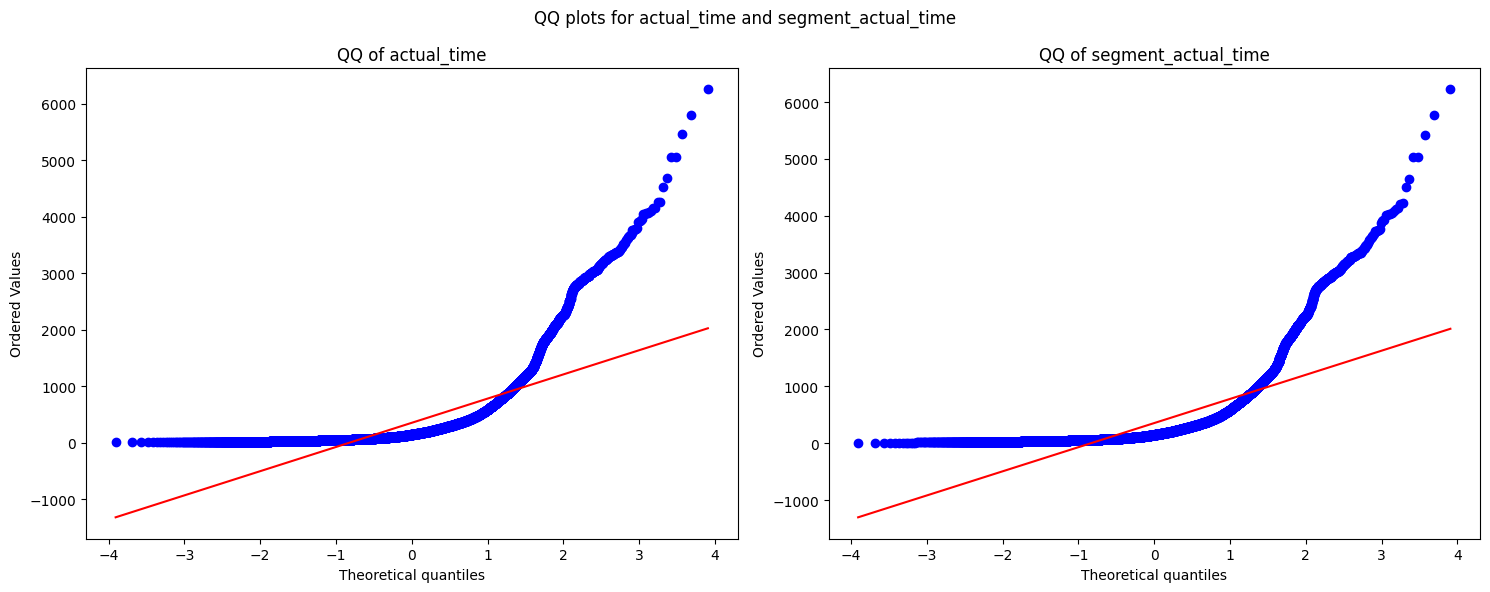

SW p-value : 0.0
Shapiro-Wilk Test: The actual_time sample does NOT follow normal distribution
SW p-value : 0.0
Shapiro-Wilk Test: The segment_actual_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The actual_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The segment_actual_time sample does NOT follow normal distribution
Levene p-value : 0.695502241317651
Levene's Test: The samples actual_time and segment_actual_time suggest equal variances.


In [ ]:
# We believe both the columns are same unless proved otherwise by the hypothesis testing

# Tests for normality and homogenity of the samples.

b51 = 'actual_time'
b52 = 'segment_actual_time'

plot_qq(b51,b52)
test_shapiro_wilk(b51)
test_shapiro_wilk(b52)
ks_test(b51)
ks_test(b52)
levenes_test(b51,b52)

In [ ]:
# Although they have equal variances, they do not follow normal distribution and T-test cannot be applied. We'll proceed with Mann-Whitney U test.

mann_whitney_u_test(b51,b52)

Mann-Whitney U Test: The samples actual_time and segment_actual_time are similiar.


**Conclusion**:

- The columns actual_time and segment_actual_time do not follow normal distribution and have equal variances.
- The columns actual_time and segment_actual_time are similiar.

**OSRM distance aggregated value and segment OSRM distance aggregated value.**

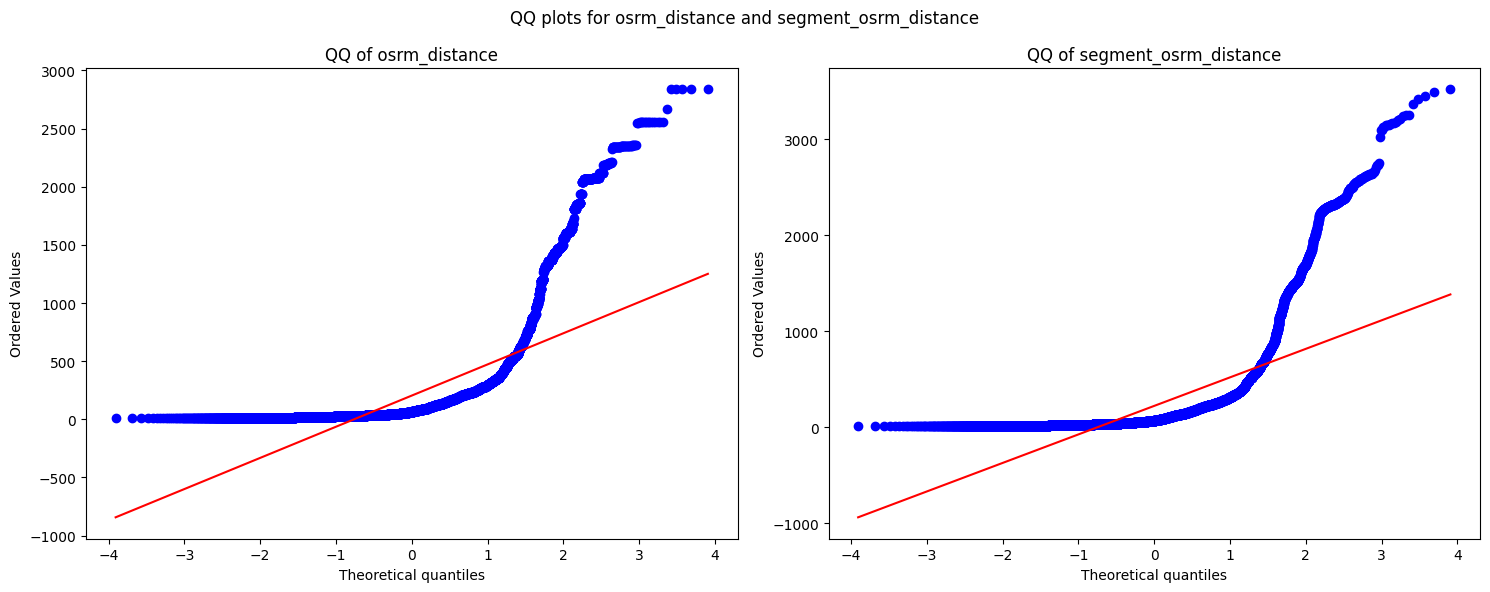

SW p-value : 0.0
Shapiro-Wilk Test: The osrm_distance sample does NOT follow normal distribution
SW p-value : 0.0
Shapiro-Wilk Test: The segment_osrm_distance sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The osrm_distance sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The segment_osrm_distance sample does NOT follow normal distribution
Levene p-value : 0.00020976006524780905
Levene's Test: The samples osrm_distance and segment_osrm_distance does NOT suggest equal variances


In [ ]:
# We believe both the columns are same unless proved otherwise by the hypothesis testing

# Tests for normality and homogenity of the samples.

c51 = 'osrm_distance'
c52 = 'segment_osrm_distance'

plot_qq(c51,c52)
test_shapiro_wilk(c51)
test_shapiro_wilk(c52)
ks_test(c51)
ks_test(c52)
levenes_test(c51,c52)

In [ ]:
# Proceeding with Mann-Whitney U test

mann_whitney_u_test(c51,c52)

Mann-Whitney U Test: The samples osrm_distance and segment_osrm_distance are different


**Conclusion:**

- The columns osrm_time and segment_osrm_time does not follow normal distribution and does not have equal variances.
- The columns osrm_time and segment_osrm_time are different.

**OSRM time aggregated value and segment OSRM time aggregated value.**

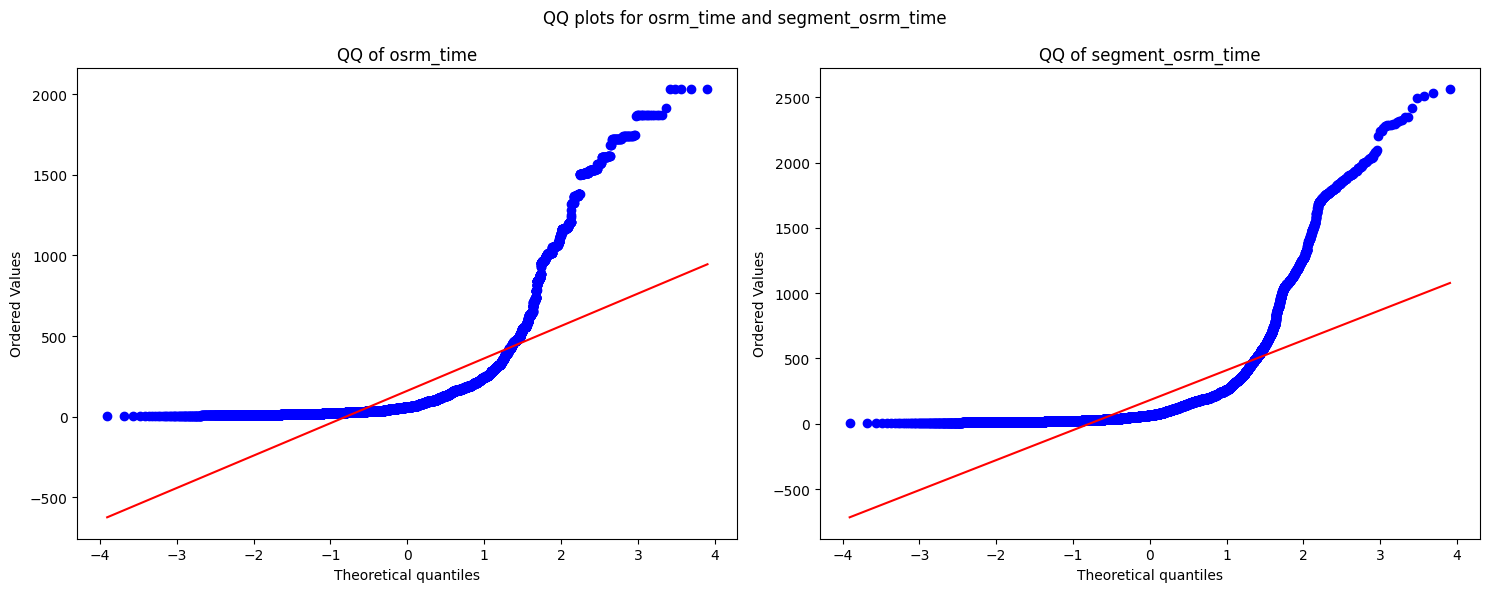

SW p-value : 0.0
Shapiro-Wilk Test: The osrm_time sample does NOT follow normal distribution
SW p-value : 0.0
Shapiro-Wilk Test: The segment_osrm_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The osrm_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The segment_osrm_time sample does NOT follow normal distribution
Levene p-value : 8.349506135727595e-08
Levene's Test: The samples osrm_time and segment_osrm_time does NOT suggest equal variances


In [ ]:
# We believe both the columns are same unless proved otherwise by the hypothesis testing

# Tests for normality and homogenity of the samples.

d51 = 'osrm_time'
d52 = 'segment_osrm_time'

plot_qq(d51,d52)
test_shapiro_wilk(d51)
test_shapiro_wilk(d52)
ks_test(d51)
ks_test(d52)
levenes_test(d51,d52)

In [ ]:
# Proceeding with Mann-Whitney U test

mann_whitney_u_test(d51,d52)

Mann-Whitney U Test: The samples osrm_time and segment_osrm_time are different


**Conclusion:**

- The columns osrm_time and segment_osrm_time does not follow normal distribution and does not have equal variances.
- The columns osrm_time and segment_osrm_time are different.

**od_total_time (created feature) and start_scan_to_end_scan**

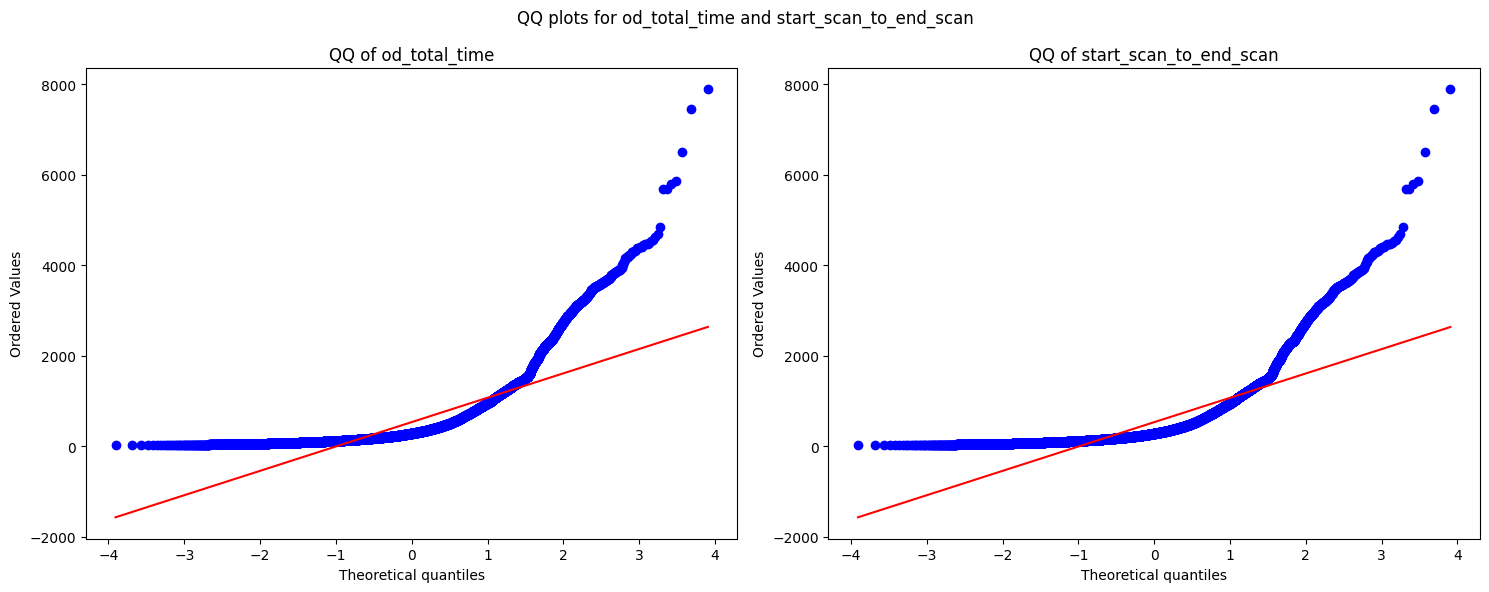

SW p-value : 0.0
Shapiro-Wilk Test: The od_total_time sample does NOT follow normal distribution
SW p-value : 0.0
Shapiro-Wilk Test: The start_scan_to_end_scan sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The od_total_time sample does NOT follow normal distribution
KS p-value : 0.0
Kolmogorov-Smirnov Test: The start_scan_to_end_scan sample does NOT follow normal distribution
Levene p-value : 0.9555778849463641
Levene's Test: The samples od_total_time and start_scan_to_end_scan suggest equal variances.


In [ ]:
# We believe both the columns are same unless proved otherwise by the hypothesis testing

# Tests for normality and homogenity of the samples.

e51 = 'od_total_time'
e52 = 'start_scan_to_end_scan'

plot_qq(e51,e52)
test_shapiro_wilk(e51)
test_shapiro_wilk(e52)
ks_test(e51)
ks_test(e52)
levenes_test(e51,e52)

In [ ]:
# Proceeding with Mann-Whitney U test

mann_whitney_u_test(e51,e52)

Mann-Whitney U Test: The samples od_total_time and start_scan_to_end_scan are similiar.


**Conclusion:**

- The created feature od_total_time and start_scan_to_end_scan does not follow normal distribution but have equal variances.
- The hypothesis testing suggests that they are statistically similiar.

In [ ]:
# To find the busiest corridor, we'll look at the most common combinations of source and destination states
corridor_counts = fe.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(1)

# Average distance and time taken for the busiest corridor
busiest_corridor_details = busiest_corridor.merge(fe, on=['source_state', 'destination_state'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_total_time'].mean()

print("Busiest corridor:  ",busiest_corridor)
print("Average distance:  ",average_distance)
print("Average time (in hours):  ",average_time/60)

Busiest corridor:      source_state destination_state  count
95  Maharashtra       Maharashtra   2453
Average distance:   71.971855
Average time (in hours):   5.264807767766907


# **Business Insights & Recommendations**

# Insights

# Data Overview

- Time Period: September 12, 2018 to October 8, 2018
- Trips: 14,817 unique IDs

- Locations:
   * 1508 unique source centers
   * 1481 unique destination centers
   * 690 unique source cities
   * 806 unique destination cities
   * 14 locations with missing names

# Trip Characteristics

 - Purpose: Majority are for testing (more than training)
 - Route Type: Most common is Carting
 - Temporal Distribution:
     * Peak hours: 10 PM to midnight
     * Peak week: 38th week of the year
     * Peak order placement: Mid-month

# Geographical Patterns

 - Source Cities: Top 5 are Mumbai, Gurgaon, Delhi, Bengaluru, Bhiwandi
 - Source States: Top 5 are Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana
 - Destination Cities: Top 5 are Mumbai, Bengaluru, Gurgaon, Delhi, Chennai
 - Destination States: Top 5 are Maharashtra, Karnataka, Haryana, Tamil Nadu, Uttar Pradesh

# Feature Similarities and Differences
 - Similar:
   * start_scan_to_end_scan and od_total_time (created feature)
   * start_scan_to_end_scan and segment_actual_time
 - Different:
   * actual_time and osrm_time
   * osrm_distance and segment_osrm_distance
   * osrm_time and segment_osrm_time
  
# Busiest Corridor:
   The busiest corridor is within Maharashtra, indicating a high volume of trips that start and end in this state.

# Average Distance:
   The average distance for trips within this corridor is approximately 72 kilometers.
# Average Time Taken:
   The average time taken for these trips is around 5.26 hours.

# **Recommendations**

1. **Resource Allocation and Scheduling**

 - **Focus on Peak Times**: Allocate more resources during peak hours (10 PM to midnight) and the 38th week of the year. Ensure sufficient staffing and transportation availability.
 - **Mid-Month Preparation**: Increase readiness around mid-month, when peak order placement occurs, to handle increased volume effectively.

2. **Geographic Optimization**

- **Strengthen Key Cities and States**: Concentrate resources in the top source and destination cities and states, particularly Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh.
- **Enhance Operations in Busiest Corridor**: Given the high volume within Maharashtra, consider deploying more vehicles and creating dedicated lanes or processes to expedite movement.

3. **Route and Trip Efficiency**

- **Optimize Carting Routes**: Since Carting is the most common route type, analyze these routes for efficiency improvements, such as direct routes or better traffic management.
- **Reduce Transit Time**: Investigate reasons for the discrepancy between actual time and osrm time, and take steps to reduce transit times, potentially through route optimization or improved traffic management.

4. **Data and Technology Utilization**

- **Advanced Analytics for Predictions**: Employ predictive analytics to anticipate demand spikes, especially during identified peak times, and adjust operations accordingly.
- **Improve GPS and Routing Technology**: Utilize advanced GPS tracking and routing technologies to find the most efficient routes in real-time, reducing distance and time discrepancies.

5. **Quality Control and Continuous Improvement**

- **Regular Data Review**: Continuously monitor trip data to identify new patterns or changes in existing trends.
- **Feedback Mechanisms**: Implement feedback loops with drivers and customers to gain insights into ground realities and improve service quality.

6. **Expansion and Diversification**

- **Explore New Markets**: Consider expanding into less serviced areas while maintaining the focus on high-demand corridors.
- **Diversify Route Types**: Analyze the potential of increasing Full Truck Load (FTL) trips where feasible to improve efficiency for longer or bulk deliveries.

7. **Training and Development**

- **Staff Training**: Conduct regular training for staff on new technologies, best practices in logistics, and efficient route planning.
- **Driver Safety Programs**: Implement safety programs for drivers, especially considering the late-night peak hours, to ensure their well-being and reduce the risk of accidents.

8. **Sustainability Initiatives**

- **Eco-Friendly Practices**: Explore options for more environmentally friendly vehicles or practices, particularly in high-traffic areas, to reduce the carbon footprint.

9. **Customer Engagement**

- **Improve Communication**: Keep customers informed about expected delivery times, especially during peak periods, to manage expectations and improve satisfaction.